# Caavo Computer Vision Challenge on Hackerearth
My solution notebook for this challenge. 

Challenege link https://www.hackerearth.com/challenge/hiring/caavo-software-engineer-hiring-challenge/machine-learning/caavo-computer-vision-challenge/ 

In [2]:
import pandas as pd
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
from tqdm import tqdm

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
%matplotlib inline

from sklearn.metrics import accuracy_score

Using TensorFlow backend.


In [0]:
import numpy as np
import pandas as pd
import os
import cv2
import sys
from tqdm import tqdm

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications

## Image Statistics

In [0]:
# returns no. of files in the directory
def scan_dir(label, path):
    dirs = os.listdir( path )
    # print the files in given directory
    return dirs

In [8]:
# training path
path = "datalab/caavo/" + 'dataset//train//'
dir_list = []
# shows the distribution of images of different categories
for i in range(15):
    label = str(i)
    dirs = scan_dir(label, path + label)
    print(label + ': ' + str(len(dirs)))
    dir_list.append(len(dirs))

0: 784
1: 6186
2: 7936
3: 8203
4: 8835
5: 683
6: 5083
7: 1248
8: 3752
9: 5301
10: 4560
11: 1248
12: 4848
13: 2935
14: 656


For finding the minimum height and width of an image out of all the images

In [0]:

min_h = 999999
min_w = 999999
# find out the minimum dimension out of all images
for i in range(15):
    label = str(i)
    dirs = scan_dir(label, path + label)
    
    # iterate through files
    for i in tqdm(range(len(dirs))):
        filename = dirs[i]
        img = cv2.imread(path + label + '//' + filename, -1)
        h, w, _ = img.shape
        # update minimum height and width if necessary
        if h < min_h:
            min_h = h
        if w < min_w:
            min_w = w
    print(label + ' done.')       
print(label + ': ' + 'min h: ' + str(min_h) + 'min w: ' + str(min_w) )

100%|█████████████████████████████████████████████████████████████████████████████████████████████| 784/784 [00:00<00:00, 909.50it/s]


0 done.


100%|███████████████████████████████████████████████████████████████████████████████████████████| 6186/6186 [00:18<00:00, 335.93it/s]


1 done.


100%|████████████████████████████████████████████████████████████████████████████████████████████| 7936/7936 [01:35<00:00, 82.87it/s]


2 done.


100%|████████████████████████████████████████████████████████████████████████████████████████████| 8203/8203 [01:40<00:00, 81.96it/s]


3 done.


100%|████████████████████████████████████████████████████████████████████████████████████████████| 8835/8835 [01:37<00:00, 90.95it/s]


4 done.


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 683/683 [00:07<00:00, 96.13it/s]


5 done.


100%|████████████████████████████████████████████████████████████████████████████████████████████| 5083/5083 [01:07<00:00, 75.34it/s]


6 done.


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1248/1248 [00:20<00:00, 59.74it/s]


7 done.


100%|████████████████████████████████████████████████████████████████████████████████████████████| 3752/3752 [00:51<00:00, 73.18it/s]


8 done.


100%|████████████████████████████████████████████████████████████████████████████████████████████| 5301/5301 [01:06<00:00, 79.45it/s]


9 done.


100%|████████████████████████████████████████████████████████████████████████████████████████████| 4560/4560 [01:16<00:00, 59.57it/s]


10 done.


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1248/1248 [00:19<00:00, 63.49it/s]


11 done.


100%|████████████████████████████████████████████████████████████████████████████████████████████| 4848/4848 [01:24<00:00, 57.69it/s]


12 done.


100%|████████████████████████████████████████████████████████████████████████████████████████████| 2935/2935 [00:54<00:00, 53.50it/s]


13 done.


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 656/656 [00:16<00:00, 40.73it/s]


14 done.
14: min h: 92min w: 92


## Correcting Data Distribution
Data distribution is not good and so we will generate images to make it less skewed. Moreover we will create a validation dataset by augmenting images from Training.

In [0]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [0]:
# generates given number of images for an image
def generate_image(label, filename, samples_per_img, dest):
    img = load_img("datalab/caavo/" + 'dataset/train//' + label + '//' + filename)  # this is a PIL image
    x = img_to_array(img)  
    x = x.reshape((1,) + x.shape)  
    i = 0
    for batch in datagen.flow(x, batch_size=1,
                              save_to_dir=dest + '//' + label + '//', save_prefix='sample', save_format='jpg'):
        i += 1
        if i > samples_per_img-1:
            break  # otherwise the generator would loop indefinitely

In [14]:
# now we will augment and save images for classes with less data
len(dir_list)

15

So we will augment data as following:<br>
0--> 5000<br>
1--> 0<br>
2--> 0<br>
3--> 0<br>
4 --> 0<br>
5 --> 5000<br>
6--> 1000<br>
7--> 5000<br>
8--> 3000<br>
9--> 1000<br>
10--> 2000<br>
11--> 5000<br>
12--> 2000<br>
13--> 3000<br>
14--> 5000<br>

In [0]:
# training path
path = "datalab/caavo/" + 'dataset//train//'

dir_list = []
# iterate through different folders and get list of files in each folder
for i in range(15):
    label = str(i)
    dirs = scan_dir(label, path + label)
    dir_list.append(dirs)

In [0]:
# for augmenting images from a folder
def augment_images(dir_list, dest, samples_per_img, req_img):
    # generate required images for each folder
    for i, curr_dir in tqdm(enumerate(dir_list)):
        print('current folder: ' + str(i))
        label = str(i)
        for _,filename in tqdm(enumerate(curr_dir)):
            if req_img[i] <= 0:
                break
            generate_image(label, filename, samples_per_img, dest)
            req_img[i] = req_img[i] - samples_per_img

## For creating better training data distribution

In [37]:
# no. of aygmented images to be generated from each image
samples_per_img = 8
# destination folder
dest = 'datalab/caavo/' + 'dataset/train/'
# required no. of images for each class
req_img = [5000, 0, 0, 0, 0, 5000, 1000, 5000, 3000, 1000, 2000, 5000, 2000, 3000, 5000]

for i in range(15):
    augment_images(dir_list, dest, samples_per_img, req_img)

0it [00:00, ?it/s]
0it [00:00, ?it/s]

current folder: 0



2it [00:00,  8.85it/s]
4it [00:00, 11.27it/s]
5it [00:00, 10.45it/s]
7it [00:00, 10.14it/s]
8it [00:00,  9.85it/s]
10it [00:00, 10.24it/s]
11it [00:01, 10.14it/s]
13it [00:01, 10.70it/s]
15it [00:01, 10.55it/s]
17it [00:01, 10.03it/s]
19it [00:01, 10.17it/s]
21it [00:02, 10.43it/s]
23it [00:02, 10.63it/s]
25it [00:02, 10.87it/s]
27it [00:02, 10.83it/s]
29it [00:02, 10.55it/s]
31it [00:02, 10.58it/s]
33it [00:03, 10.51it/s]
35it [00:03, 10.30it/s]
37it [00:03, 10.26it/s]
38it [00:03, 10.13it/s]
40it [00:03, 10.14it/s]
41it [00:04,  9.96it/s]
43it [00:04, 10.09it/s]
45it [00:04, 10.06it/s]
46it [00:04, 10.02it/s]
47it [00:04,  9.93it/s]
48it [00:04,  9.92it/s]
49it [00:04,  9.85it/s]
51it [00:05,  9.83it/s]
53it [00:05,  9.94it/s]
55it [00:05,  9.83it/s]
57it [00:05,  9.85it/s]
59it [00:05,  9.92it/s]
61it [00:06,  9.90it/s]
63it [00:06,  9.91it/s]
65it [00:06,  9.92it/s]
67it [00:06,  9.80it/s]
70it [00:06, 10.03it/s]
72it [00:07, 10.07it/s]
74it [00:07, 10.19it/s]
76it [00:07, 10.15it


89it [00:09,  9.80it/s]
91it [00:09,  9.84it/s]
93it [00:09,  9.87it/s]
95it [00:09,  9.86it/s]
97it [00:09,  9.95it/s]
99it [00:10,  9.87it/s]
101it [00:10,  9.82it/s]
102it [00:10,  9.82it/s]
103it [00:10,  9.79it/s]
104it [00:10,  9.77it/s]
105it [00:10,  9.75it/s]
107it [00:10,  9.74it/s]
108it [00:11,  9.73it/s]
109it [00:11,  9.72it/s]
110it [00:11,  9.70it/s]
111it [00:11,  9.70it/s]
112it [00:11,  9.70it/s]
113it [00:11,  9.66it/s]
114it [00:11,  9.65it/s]
116it [00:11,  9.71it/s]
118it [00:12,  9.73it/s]
120it [00:12,  9.77it/s]
122it [00:12,  9.72it/s]
124it [00:12,  9.68it/s]
126it [00:12,  9.74it/s]
128it [00:13,  9.70it/s]
130it [00:13,  9.64it/s]
131it [00:13,  9.62it/s]
132it [00:13,  9.63it/s]
133it [00:13,  9.62it/s]
134it [00:13,  9.62it/s]
135it [00:14,  9.62it/s]
136it [00:14,  9.58it/s]
137it [00:14,  9.55it/s]
138it [00:14,  9.55it/s]
139it [00:14,  9.53it/s]
140it [00:14,  9.53it/s]
142it [00:14,  9.56it/s]
144it [00:15,  9.56it/s]
145it [00:15,  9.55it/s]
146it


157it [00:16,  9.53it/s]
159it [00:16,  9.53it/s]
160it [00:16,  9.53it/s]
161it [00:16,  9.50it/s]
162it [00:17,  9.50it/s]
164it [00:17,  9.53it/s]
165it [00:17,  9.53it/s]
166it [00:17,  9.51it/s]
167it [00:17,  9.51it/s]
169it [00:17,  9.53it/s]
171it [00:17,  9.56it/s]
173it [00:18,  9.54it/s]
174it [00:18,  9.54it/s]
176it [00:18,  9.56it/s]
178it [00:18,  9.54it/s]
180it [00:18,  9.53it/s]
181it [00:19,  9.52it/s]
182it [00:19,  9.51it/s]
184it [00:19,  9.52it/s]
186it [00:19,  9.55it/s]
188it [00:19,  9.56it/s]
190it [00:19,  9.55it/s]
191it [00:20,  9.55it/s]
193it [00:20,  9.57it/s]
195it [00:20,  9.55it/s]
197it [00:20,  9.54it/s]
199it [00:20,  9.58it/s]
201it [00:20,  9.58it/s]
203it [00:21,  9.59it/s]
205it [00:21,  9.56it/s]
206it [00:21,  9.55it/s]
208it [00:21,  9.57it/s]
210it [00:21,  9.57it/s]
211it [00:22,  9.55it/s]
213it [00:22,  9.56it/s]
214it [00:22,  9.55it/s]
216it [00:22,  9.55it/s]
217it [00:22,  9.54it/s]
218it [00:22,  9.54it/s]
220it [00:23,  9.56it/s]

234it [00:24,  9.56it/s]
236it [00:24,  9.59it/s]
238it [00:24,  9.59it/s]
240it [00:25,  9.60it/s]
242it [00:25,  9.61it/s]
244it [00:25,  9.59it/s]
246it [00:25,  9.62it/s]
248it [00:25,  9.64it/s]
250it [00:25,  9.65it/s]
252it [00:26,  9.64it/s]
254it [00:26,  9.66it/s]
256it [00:26,  9.66it/s]
258it [00:26,  9.67it/s]
260it [00:26,  9.67it/s]
262it [00:27,  9.68it/s]
264it [00:27,  9.66it/s]
265it [00:27,  9.66it/s]
267it [00:27,  9.67it/s]
268it [00:27,  9.67it/s]
269it [00:27,  9.66it/s]
270it [00:27,  9.65it/s]
272it [00:28,  9.66it/s]
273it [00:28,  9.65it/s]
275it [00:28,  9.67it/s]
277it [00:28,  9.65it/s]
279it [00:28,  9.65it/s]
280it [00:29,  9.65it/s]
281it [00:29,  9.65it/s]
282it [00:29,  9.64it/s]
283it [00:29,  9.62it/s]
284it [00:29,  9.62it/s]
285it [00:29,  9.61it/s]
286it [00:29,  9.61it/s]
287it [00:29,  9.60it/s]
288it [00:29,  9.60it/s]
289it [00:30,  9.60it/s]
290it [00:30,  9.59it/s]
291it [00:30,  9.58it/s]
292it [00:30,  9.57it/s]
293it [00:30,  9.56it/s]



307it [00:32,  9.59it/s]
309it [00:32,  9.59it/s]
311it [00:32,  9.59it/s]
313it [00:32,  9.60it/s]
315it [00:32,  9.60it/s]
317it [00:33,  9.58it/s]
319it [00:33,  9.60it/s]
321it [00:33,  9.60it/s]
323it [00:33,  9.61it/s]
325it [00:33,  9.62it/s]
327it [00:33,  9.62it/s]
329it [00:34,  9.62it/s]
331it [00:34,  9.62it/s]
333it [00:34,  9.63it/s]
335it [00:34,  9.64it/s]
337it [00:34,  9.63it/s]
339it [00:35,  9.61it/s]
341it [00:35,  9.63it/s]
343it [00:35,  9.61it/s]
344it [00:35,  9.61it/s]
345it [00:35,  9.60it/s]
346it [00:36,  9.60it/s]
347it [00:36,  9.60it/s]
348it [00:36,  9.60it/s]
349it [00:36,  9.58it/s]
351it [00:36,  9.59it/s]
353it [00:36,  9.58it/s]
354it [00:36,  9.57it/s]
356it [00:37,  9.59it/s]
358it [00:37,  9.59it/s]
360it [00:37,  9.60it/s]
362it [00:37,  9.60it/s]
364it [00:37,  9.60it/s]
366it [00:38,  9.60it/s]
367it [00:38,  9.58it/s]
368it [00:38,  9.58it/s]
369it [00:38,  9.58it/s]
370it [00:38,  9.57it/s]
371it [00:38,  9.57it/s]
373it [00:38,  9.57it/s]

392it [00:40,  9.61it/s]
394it [00:41,  9.60it/s]
395it [00:41,  9.60it/s]
397it [00:41,  9.60it/s]
399it [00:41,  9.59it/s]
401it [00:41,  9.59it/s]
402it [00:41,  9.59it/s]
403it [00:42,  9.58it/s]
404it [00:42,  9.58it/s]
405it [00:42,  9.58it/s]
407it [00:42,  9.58it/s]
408it [00:42,  9.58it/s]
409it [00:42,  9.58it/s]
411it [00:42,  9.59it/s]
413it [00:43,  9.59it/s]
415it [00:43,  9.60it/s]
417it [00:43,  9.59it/s]
418it [00:43,  9.59it/s]
419it [00:43,  9.58it/s]
420it [00:43,  9.58it/s]
421it [00:43,  9.58it/s]
423it [00:44,  9.59it/s]
425it [00:44,  9.58it/s]
426it [00:44,  9.58it/s]
427it [00:44,  9.57it/s]
429it [00:44,  9.58it/s]
431it [00:45,  9.57it/s]
432it [00:45,  9.56it/s]
433it [00:45,  9.55it/s]
435it [00:45,  9.57it/s]
437it [00:45,  9.57it/s]
439it [00:45,  9.57it/s]
441it [00:46,  9.57it/s]
443it [00:46,  9.58it/s]
445it [00:46,  9.58it/s]
447it [00:46,  9.58it/s]
449it [00:46,  9.59it/s]
451it [00:47,  9.60it/s]
453it [00:47,  9.60it/s]
455it [00:47,  9.60it/s]



475it [00:49,  9.63it/s]
476it [00:49,  9.62it/s]
478it [00:49,  9.63it/s]
479it [00:49,  9.62it/s]
480it [00:49,  9.62it/s]
481it [00:50,  9.61it/s]
483it [00:50,  9.61it/s]
485it [00:50,  9.62it/s]
487it [00:50,  9.61it/s]
489it [00:50,  9.62it/s]
491it [00:51,  9.62it/s]
493it [00:51,  9.62it/s]
495it [00:51,  9.63it/s]
497it [00:51,  9.63it/s]
499it [00:51,  9.63it/s]
501it [00:52,  9.63it/s]
502it [00:52,  9.62it/s]
504it [00:52,  9.63it/s]
505it [00:52,  9.62it/s]
507it [00:52,  9.62it/s]
508it [00:52,  9.62it/s]
510it [00:52,  9.63it/s]
512it [00:53,  9.63it/s]
513it [00:53,  9.62it/s]
514it [00:53,  9.62it/s]
516it [00:53,  9.62it/s]
517it [00:53,  9.62it/s]
518it [00:53,  9.61it/s]
519it [00:54,  9.60it/s]
520it [00:54,  9.60it/s]
522it [00:54,  9.61it/s]
523it [00:54,  9.61it/s]
525it [00:54,  9.62it/s]
528it [00:54,  9.64it/s]
530it [00:54,  9.64it/s]
532it [00:55,  9.63it/s]
534it [00:55,  9.63it/s]
535it [00:55,  9.62it/s]
536it [00:55,  9.62it/s]
537it [00:55,  9.61it/s]

550it [00:57,  9.61it/s]
552it [00:57,  9.62it/s]
554it [00:57,  9.62it/s]
555it [00:57,  9.61it/s]
557it [00:57,  9.61it/s]
559it [00:58,  9.62it/s]
561it [00:58,  9.62it/s]
563it [00:58,  9.62it/s]
564it [00:58,  9.61it/s]
565it [00:58,  9.61it/s]
567it [00:58,  9.61it/s]
568it [00:59,  9.61it/s]
569it [00:59,  9.60it/s]
570it [00:59,  9.60it/s]
572it [00:59,  9.60it/s]
573it [00:59,  9.60it/s]
574it [00:59,  9.60it/s]
575it [00:59,  9.60it/s]
576it [01:00,  9.59it/s]
577it [01:00,  9.59it/s]
578it [01:00,  9.58it/s]
579it [01:00,  9.58it/s]
581it [01:00,  9.59it/s]
583it [01:00,  9.59it/s]
585it [01:00,  9.60it/s]
587it [01:01,  9.60it/s]
589it [01:01,  9.60it/s]
591it [01:01,  9.61it/s]
593it [01:01,  9.61it/s]
595it [01:01,  9.61it/s]
597it [01:02,  9.61it/s]
599it [01:02,  9.61it/s]
601it [01:02,  9.61it/s]
602it [01:02,  9.60it/s]
603it [01:02,  9.60it/s]
604it [01:02,  9.60it/s]
605it [01:03,  9.59it/s]
606it [01:03,  9.59it/s]
608it [01:03,  9.59it/s]
609it [01:03,  9.59it/s]



622it [01:04,  9.58it/s]
623it [01:05,  9.57it/s]
624it [01:05,  9.57it/s]
1it [01:05, 65.36s/it]

0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]

current folder: 1
current folder: 2
current folder: 3
current folder: 4
current folder: 5




2it [00:00, 12.20it/s]

3it [00:00, 10.07it/s]

6it [00:00, 13.01it/s]

8it [00:00, 12.43it/s]

9it [00:00, 11.14it/s]

10it [00:00, 10.82it/s]

11it [00:01, 10.31it/s]

13it [00:01, 10.60it/s]

15it [00:01, 10.62it/s]

16it [00:01, 10.39it/s]

17it [00:01, 10.13it/s]

19it [00:01, 10.45it/s]

21it [00:02,  9.91it/s]

22it [00:02,  9.87it/s]

24it [00:02,  9.98it/s]

26it [00:02,  9.97it/s]

28it [00:02, 10.08it/s]

30it [00:02, 10.21it/s]

32it [00:03,  9.98it/s]

33it [00:03,  9.92it/s]

35it [00:03,  9.98it/s]

37it [00:03, 10.15it/s]

39it [00:03, 10.25it/s]

41it [00:03, 10.32it/s]

44it [00:04, 10.54it/s]

46it [00:04, 10.45it/s]

48it [00:04, 10.26it/s]
50it [00:04, 10.02it/s]
51it [00:05,  9.97it/s]
53it [00:05, 10.02it/s]
54it [00:05,  9.98it/s]
55it [00:05,  9.96it/s]
57it [00:05,  9.98it/s]
58it [00:05,  9.91it/s]
59it [00:05,  9.91it/s]
60it [00:06,  9.90it/s]
61it [00:06,  9.85it/s]
62it [00:06,  9.82it/s]
63it [00:06,  9.72it/s]
65it [00:06,  9.72it/s]
67it [00:06,  9.7

76it [00:07,  9.76it/s]
78it [00:07,  9.86it/s]
80it [00:08,  9.85it/s]
82it [00:08,  9.81it/s]
84it [00:08,  9.83it/s]
86it [00:08,  9.83it/s]
88it [00:08,  9.91it/s]
90it [00:09,  9.97it/s]
92it [00:09,  9.98it/s]
94it [00:09, 10.00it/s]
96it [00:09,  9.90it/s]
98it [00:09,  9.94it/s]
100it [00:10,  9.91it/s]
102it [00:10,  9.94it/s]
104it [00:10,  9.89it/s]
106it [00:10,  9.89it/s]
107it [00:10,  9.88it/s]
108it [00:10,  9.82it/s]
110it [00:11,  9.88it/s]
112it [00:11,  9.93it/s]
114it [00:11,  9.96it/s]
116it [00:11,  9.95it/s]
118it [00:11,  9.93it/s]
120it [00:12,  9.94it/s]
122it [00:12,  9.88it/s]
123it [00:12,  9.88it/s]
124it [00:12,  9.87it/s]
126it [00:12,  9.89it/s]
128it [00:12,  9.96it/s]
130it [00:13,  9.98it/s]
132it [00:13,  9.94it/s]
134it [00:13, 10.00it/s]
136it [00:13, 10.06it/s]
138it [00:13, 10.13it/s]
140it [00:13, 10.08it/s]
142it [00:14, 10.02it/s]
144it [00:14, 10.07it/s]
146it [00:14, 10.04it/s]
148it [00:14, 10.07it/s]
150it [00:14, 10.07it/s]
152it [00:15


170it [00:16, 10.14it/s]
172it [00:16, 10.17it/s]
174it [00:17, 10.16it/s]
176it [00:17, 10.18it/s]
178it [00:17, 10.17it/s]
180it [00:17, 10.16it/s]
182it [00:17, 10.12it/s]
184it [00:18, 10.16it/s]
186it [00:18, 10.13it/s]
188it [00:18, 10.12it/s]
190it [00:18, 10.17it/s]
192it [00:18, 10.13it/s]
194it [00:19, 10.10it/s]
196it [00:19, 10.13it/s]
198it [00:19, 10.15it/s]
200it [00:19, 10.18it/s]
202it [00:19, 10.17it/s]
204it [00:20, 10.17it/s]
206it [00:20, 10.13it/s]
208it [00:20, 10.12it/s]
209it [00:20, 10.10it/s]
210it [00:20, 10.07it/s]
211it [00:20, 10.07it/s]
213it [00:21, 10.05it/s]
215it [00:21, 10.04it/s]
216it [00:21, 10.01it/s]
217it [00:21,  9.99it/s]
218it [00:21,  9.99it/s]
219it [00:21,  9.97it/s]
220it [00:22,  9.95it/s]
221it [00:22,  9.94it/s]
222it [00:22,  9.93it/s]
223it [00:22,  9.90it/s]
224it [00:22,  9.90it/s]
225it [00:22,  9.88it/s]
226it [00:22,  9.85it/s]
227it [00:23,  9.84it/s]
228it [00:23,  9.83it/s]
230it [00:23,  9.86it/s]
232it [00:23,  9.89it/s]

249it [00:25,  9.89it/s]
251it [00:25,  9.89it/s]
253it [00:25,  9.90it/s]
255it [00:25,  9.92it/s]
257it [00:25,  9.92it/s]
259it [00:26,  9.90it/s]
262it [00:26,  9.94it/s]
264it [00:26,  9.94it/s]
266it [00:26,  9.94it/s]
268it [00:26,  9.94it/s]
270it [00:27,  9.93it/s]
272it [00:27,  9.95it/s]
274it [00:27,  9.94it/s]
276it [00:27,  9.97it/s]
278it [00:27,  9.99it/s]
281it [00:28, 10.01it/s]
283it [00:28, 10.02it/s]
285it [00:28, 10.01it/s]
287it [00:28, 10.03it/s]
289it [00:28, 10.03it/s]
291it [00:29, 10.01it/s]
293it [00:29, 10.01it/s]
295it [00:29,  9.99it/s]
296it [00:29,  9.97it/s]
298it [00:29,  9.98it/s]
299it [00:29,  9.98it/s]
300it [00:30,  9.95it/s]
301it [00:30,  9.94it/s]
303it [00:30,  9.95it/s]
305it [00:30,  9.95it/s]
306it [00:30,  9.94it/s]
307it [00:30,  9.94it/s]
309it [00:31,  9.96it/s]
311it [00:31,  9.97it/s]
313it [00:31,  9.98it/s]
315it [00:31, 10.01it/s]
317it [00:31,  9.99it/s]
319it [00:31, 10.01it/s]
321it [00:32, 10.02it/s]
323it [00:32, 10.04it/s]



342it [00:34,  9.96it/s]
343it [00:34,  9.96it/s]
344it [00:34,  9.95it/s]
345it [00:34,  9.94it/s]
347it [00:34,  9.94it/s]
348it [00:35,  9.93it/s]
350it [00:35,  9.95it/s]
352it [00:35,  9.96it/s]
354it [00:35,  9.98it/s]
356it [00:35,  9.97it/s]
358it [00:35,  9.98it/s]
360it [00:36,  9.96it/s]
362it [00:36,  9.97it/s]
364it [00:36,  9.99it/s]
366it [00:36,  9.98it/s]
368it [00:36, 10.00it/s]
370it [00:37,  9.99it/s]
372it [00:37,  9.98it/s]
374it [00:37,  9.98it/s]
376it [00:37,  9.97it/s]
377it [00:37,  9.96it/s]
378it [00:37,  9.95it/s]
379it [00:38,  9.94it/s]
381it [00:38,  9.96it/s]
383it [00:38,  9.95it/s]
385it [00:38,  9.94it/s]
387it [00:38,  9.95it/s]
389it [00:39,  9.97it/s]
391it [00:39,  9.97it/s]
393it [00:39,  9.94it/s]
395it [00:39,  9.94it/s]
397it [00:39,  9.96it/s]
399it [00:40,  9.97it/s]
401it [00:40,  9.95it/s]
403it [00:40,  9.95it/s]
405it [00:40,  9.94it/s]
407it [00:40,  9.94it/s]
409it [00:41,  9.93it/s]
411it [00:41,  9.94it/s]
413it [00:41,  9.93it/s]

426it [00:42,  9.93it/s]
428it [00:43,  9.91it/s]
430it [00:43,  9.92it/s]
432it [00:43,  9.93it/s]
434it [00:43,  9.94it/s]
436it [00:43,  9.94it/s]
438it [00:44,  9.95it/s]
440it [00:44,  9.96it/s]
442it [00:44,  9.97it/s]
444it [00:44,  9.97it/s]
446it [00:44,  9.96it/s]
448it [00:44,  9.97it/s]
450it [00:45,  9.96it/s]
452it [00:45,  9.96it/s]
454it [00:45,  9.97it/s]
456it [00:45,  9.95it/s]
458it [00:46,  9.95it/s]
460it [00:46,  9.96it/s]
462it [00:46,  9.95it/s]
464it [00:46,  9.95it/s]
467it [00:46,  9.97it/s]
469it [00:47,  9.96it/s]
471it [00:47,  9.96it/s]
473it [00:47,  9.97it/s]
475it [00:47,  9.98it/s]
477it [00:47,  9.98it/s]
479it [00:47,  9.99it/s]
481it [00:48,  9.99it/s]
483it [00:48, 10.00it/s]
485it [00:48,  9.99it/s]
487it [00:48,  9.98it/s]
489it [00:48, 10.00it/s]
491it [00:49,  9.99it/s]
494it [00:49, 10.02it/s]
496it [00:49, 10.02it/s]
498it [00:49, 10.02it/s]
500it [00:49, 10.01it/s]
502it [00:50, 10.01it/s]
504it [00:50, 10.01it/s]
505it [00:50, 10.00it/s]



522it [00:52,  9.98it/s]
524it [00:52,  9.99it/s]
525it [00:52,  9.99it/s]
527it [00:52,  9.99it/s]
529it [00:52, 10.00it/s]
531it [00:53, 10.00it/s]
533it [00:53,  9.99it/s]
534it [00:53,  9.99it/s]
536it [00:53,  9.99it/s]
537it [00:53,  9.99it/s]
538it [00:53,  9.98it/s]
539it [00:54,  9.98it/s]
540it [00:54,  9.98it/s]
541it [00:54,  9.98it/s]
542it [00:54,  9.98it/s]
544it [00:54,  9.98it/s]
545it [00:54,  9.97it/s]
546it [00:54,  9.97it/s]
547it [00:54,  9.97it/s]
548it [00:54,  9.97it/s]
549it [00:55,  9.96it/s]
551it [00:55,  9.97it/s]
553it [00:55,  9.99it/s]
555it [00:55,  9.98it/s]
557it [00:55,  9.98it/s]
559it [00:56,  9.98it/s]
561it [00:56,  9.97it/s]
563it [00:56,  9.98it/s]
565it [00:56,  9.99it/s]
567it [00:56,  9.99it/s]
569it [00:56, 10.00it/s]
571it [00:57,  9.99it/s]
573it [00:57,  9.99it/s]
575it [00:57,  9.99it/s]
577it [00:57,  9.99it/s]
579it [00:57, 10.00it/s]
581it [00:58, 10.01it/s]
583it [00:58, 10.01it/s]
585it [00:58, 10.00it/s]
587it [00:58, 10.00it/s]

604it [01:00, 10.00it/s]
606it [01:00, 10.01it/s]
608it [01:00, 10.01it/s]
610it [01:00, 10.01it/s]
612it [01:01, 10.02it/s]
614it [01:01, 10.02it/s]
616it [01:01, 10.02it/s]
618it [01:01, 10.01it/s]
620it [01:01, 10.00it/s]
621it [01:02, 10.00it/s]
622it [01:02,  9.99it/s]
623it [01:02,  9.99it/s]
6it [02:08, 21.34s/it]

0it [00:00, ?it/s]

1it [00:00,  9.22it/s]

current folder: 6




2it [00:00,  9.01it/s]

4it [00:00, 10.36it/s]

6it [00:00, 10.75it/s]

7it [00:00,  9.78it/s]

8it [00:00,  9.75it/s]

10it [00:00, 10.38it/s]

11it [00:01,  9.94it/s]

12it [00:01,  9.90it/s]

14it [00:01, 10.17it/s]

16it [00:01, 10.02it/s]

18it [00:01, 10.25it/s]

20it [00:01, 10.65it/s]

22it [00:02, 10.28it/s]
24it [00:02, 10.34it/s]
26it [00:02, 10.30it/s]
28it [00:02, 10.49it/s]
30it [00:02, 10.50it/s]
32it [00:03, 10.65it/s]
34it [00:03, 10.84it/s]
36it [00:03, 10.98it/s]
38it [00:03, 10.92it/s]
40it [00:03, 11.03it/s]
42it [00:03, 11.15it/s]
44it [00:03, 11.30it/s]
46it [00:04, 11.11it/s]
48it [00:04, 11.20it/s]
50it [00:04, 11.37it/s]
52it [00:04, 11.43it/s]
54it [00:04, 11.50it/s]
56it [00:04, 11.53it/s]
58it [00:05, 11.53it/s]
60it [00:05, 11.49it/s]
62it [00:05, 11.59it/s]
64it [00:05, 11.62it/s]
66it [00:05, 11.48it/s]
68it [00:05, 11.42it/s]
70it [00:06, 11.44it/s]
72it [00:06, 11.49it/s]
74it [00:06, 11.52it/s]
76it [00:06, 11.64it/s]
79it [00:06, 11.73it/s]
81it [0


96it [00:07, 12.14it/s]
98it [00:08, 12.18it/s]
100it [00:08, 12.20it/s]
102it [00:08, 12.28it/s]
104it [00:08, 12.31it/s]
106it [00:08, 12.30it/s]
108it [00:08, 12.30it/s]
110it [00:08, 12.32it/s]
112it [00:09, 12.27it/s]
114it [00:09, 12.17it/s]
116it [00:09, 12.19it/s]
118it [00:09, 12.18it/s]
120it [00:09, 12.17it/s]
122it [00:09, 12.23it/s]
7it [02:18, 19.75s/it]

0it [00:00, ?it/s]

1it [00:00,  6.39it/s]

current folder: 7




2it [00:00,  7.28it/s]

3it [00:00,  7.99it/s]

4it [00:00,  7.39it/s]

5it [00:00,  7.77it/s]

8it [00:00,  9.42it/s]

10it [00:01,  9.49it/s]

13it [00:01, 10.81it/s]

15it [00:01, 10.28it/s]

17it [00:01, 10.18it/s]

19it [00:01, 10.06it/s]
21it [00:01, 10.55it/s]
23it [00:02, 10.91it/s]
25it [00:02, 10.32it/s]
27it [00:02, 10.50it/s]
29it [00:02, 10.60it/s]
31it [00:03, 10.24it/s]
33it [00:03, 10.40it/s]
35it [00:03, 10.22it/s]
37it [00:03, 10.31it/s]
39it [00:03, 10.50it/s]
41it [00:03, 10.60it/s]
43it [00:04, 10.75it/s]
45it [00:04, 10.74it/s]
47it [00:04, 10.66it/s]
49it [00:04, 10.71it/s]
51it [00:04, 10.90it/s]
53it [00:04, 10.83it/s]
55it [00:05, 10.72it/s]
57it [00:05, 10.64it/s]
59it [00:05, 10.55it/s]
60it [00:05, 10.47it/s]
61it [00:05, 10.46it/s]
62it [00:05, 10.39it/s]
63it [00:06, 10.34it/s]
65it [00:06, 10.42it/s]
67it [00:06, 10.44it/s]
69it [00:06, 10.39it/s]
70it [00:06, 10.28it/s]
71it [00:06, 10.25it/s]
73it [00:07, 10.25it/s]
74it [00:07, 10.19it/s]
75it [00:0


84it [00:08,  9.94it/s]
85it [00:08,  9.88it/s]
86it [00:08,  9.83it/s]
88it [00:08,  9.89it/s]
89it [00:09,  9.86it/s]
92it [00:09,  9.99it/s]
94it [00:09,  9.89it/s]
95it [00:09,  9.85it/s]
97it [00:09,  9.94it/s]
99it [00:09,  9.96it/s]
101it [00:10, 10.02it/s]
103it [00:10,  9.99it/s]
105it [00:10,  9.98it/s]
107it [00:10,  9.95it/s]
109it [00:10,  9.95it/s]
111it [00:11,  9.97it/s]
113it [00:11, 10.05it/s]
115it [00:11, 10.09it/s]
117it [00:11, 10.11it/s]
119it [00:11, 10.12it/s]
121it [00:12, 10.04it/s]
124it [00:12, 10.13it/s]
126it [00:12, 10.21it/s]
128it [00:12, 10.25it/s]
130it [00:12, 10.20it/s]
132it [00:12, 10.19it/s]
134it [00:13, 10.27it/s]
136it [00:13, 10.26it/s]
138it [00:13, 10.24it/s]
140it [00:13, 10.26it/s]
142it [00:13, 10.24it/s]
144it [00:14, 10.27it/s]
146it [00:14, 10.28it/s]
148it [00:14, 10.31it/s]
151it [00:14, 10.39it/s]
153it [00:14, 10.41it/s]
155it [00:14, 10.40it/s]
157it [00:15, 10.43it/s]
159it [00:15, 10.43it/s]
161it [00:15, 10.41it/s]
163it [00


181it [00:17, 10.43it/s]
183it [00:17, 10.46it/s]
185it [00:17, 10.43it/s]
187it [00:17, 10.44it/s]
189it [00:18, 10.45it/s]
191it [00:18, 10.43it/s]
193it [00:18, 10.45it/s]
195it [00:18, 10.38it/s]
197it [00:18, 10.41it/s]
199it [00:19, 10.46it/s]
201it [00:19, 10.43it/s]
203it [00:19, 10.43it/s]
205it [00:19, 10.42it/s]
207it [00:19, 10.42it/s]
209it [00:20, 10.41it/s]
211it [00:20, 10.43it/s]
213it [00:20, 10.45it/s]
215it [00:20, 10.45it/s]
218it [00:20, 10.52it/s]
220it [00:20, 10.48it/s]
222it [00:21, 10.48it/s]
224it [00:21, 10.44it/s]
226it [00:21, 10.44it/s]
228it [00:21, 10.45it/s]
230it [00:22, 10.45it/s]
232it [00:22, 10.41it/s]
233it [00:22, 10.40it/s]
235it [00:22, 10.39it/s]
236it [00:22, 10.38it/s]
238it [00:22, 10.38it/s]
239it [00:23, 10.35it/s]
240it [00:23, 10.34it/s]
241it [00:23, 10.33it/s]
243it [00:23, 10.33it/s]
245it [00:23, 10.36it/s]
247it [00:23, 10.35it/s]
249it [00:23, 10.38it/s]
251it [00:24, 10.39it/s]
253it [00:24, 10.41it/s]
255it [00:24, 10.42it/s]

270it [00:26, 10.36it/s]
271it [00:26, 10.33it/s]
272it [00:26, 10.31it/s]
274it [00:26, 10.34it/s]
276it [00:26, 10.33it/s]
278it [00:26, 10.36it/s]
280it [00:27, 10.35it/s]
282it [00:27, 10.34it/s]
284it [00:27, 10.36it/s]
286it [00:27, 10.35it/s]
288it [00:27, 10.36it/s]
290it [00:28, 10.33it/s]
292it [00:28, 10.32it/s]
293it [00:28, 10.31it/s]
294it [00:28, 10.29it/s]
295it [00:28, 10.28it/s]
296it [00:28, 10.27it/s]
297it [00:28, 10.26it/s]
298it [00:29, 10.23it/s]
299it [00:29, 10.22it/s]
301it [00:29, 10.21it/s]
302it [00:29, 10.20it/s]
303it [00:29, 10.20it/s]
304it [00:29, 10.18it/s]
306it [00:29, 10.21it/s]
308it [00:30, 10.18it/s]
310it [00:30, 10.19it/s]
312it [00:30, 10.17it/s]
314it [00:30, 10.20it/s]
316it [00:31, 10.19it/s]
318it [00:31, 10.21it/s]
320it [00:31, 10.17it/s]
322it [00:31, 10.15it/s]
323it [00:31, 10.14it/s]
324it [00:31, 10.13it/s]
326it [00:32, 10.16it/s]
328it [00:32, 10.15it/s]
330it [00:32, 10.17it/s]
332it [00:32, 10.16it/s]
334it [00:32, 10.13it/s]



350it [00:34, 10.09it/s]
352it [00:34, 10.10it/s]
354it [00:34, 10.12it/s]
356it [00:35, 10.12it/s]
358it [00:35, 10.11it/s]
360it [00:35, 10.10it/s]
362it [00:35, 10.08it/s]
365it [00:36, 10.10it/s]
367it [00:36, 10.09it/s]
369it [00:36, 10.08it/s]
371it [00:36, 10.10it/s]
373it [00:36, 10.10it/s]
375it [00:37, 10.11it/s]
377it [00:37, 10.13it/s]
379it [00:37, 10.15it/s]
381it [00:37, 10.15it/s]
383it [00:37, 10.14it/s]
385it [00:37, 10.16it/s]
387it [00:38, 10.14it/s]
389it [00:38, 10.13it/s]
391it [00:38, 10.13it/s]
393it [00:38, 10.14it/s]
395it [00:38, 10.14it/s]
397it [00:39, 10.17it/s]
399it [00:39, 10.18it/s]
401it [00:39, 10.19it/s]
403it [00:39, 10.16it/s]
405it [00:39, 10.17it/s]
407it [00:40, 10.16it/s]
409it [00:40, 10.17it/s]
411it [00:40, 10.16it/s]
413it [00:40, 10.13it/s]
416it [00:40, 10.17it/s]
418it [00:41, 10.16it/s]
420it [00:41, 10.16it/s]
422it [00:41, 10.16it/s]
424it [00:41, 10.18it/s]
426it [00:41, 10.19it/s]
428it [00:42, 10.18it/s]
430it [00:42, 10.17it/s]

449it [00:43, 10.21it/s]
451it [00:44, 10.22it/s]
453it [00:44, 10.23it/s]
455it [00:44, 10.23it/s]
457it [00:44, 10.22it/s]
459it [00:44, 10.22it/s]
461it [00:45, 10.23it/s]
463it [00:45, 10.24it/s]
465it [00:45, 10.23it/s]
467it [00:45, 10.23it/s]
469it [00:45, 10.25it/s]
471it [00:46, 10.24it/s]
473it [00:46, 10.25it/s]
475it [00:46, 10.25it/s]
477it [00:46, 10.25it/s]
480it [00:46, 10.27it/s]
483it [00:46, 10.29it/s]
485it [00:47, 10.29it/s]
487it [00:47, 10.29it/s]
489it [00:47, 10.29it/s]
491it [00:47, 10.29it/s]
493it [00:47, 10.29it/s]
495it [00:48, 10.28it/s]
497it [00:48, 10.28it/s]
500it [00:48, 10.30it/s]
502it [00:48, 10.29it/s]
504it [00:48, 10.31it/s]
506it [00:49, 10.30it/s]
508it [00:49, 10.29it/s]
510it [00:49, 10.29it/s]
512it [00:49, 10.30it/s]
514it [00:49, 10.29it/s]
516it [00:50, 10.29it/s]
518it [00:50, 10.30it/s]
520it [00:50, 10.30it/s]
522it [00:50, 10.30it/s]
524it [00:50, 10.32it/s]
526it [00:51, 10.30it/s]
528it [00:51, 10.32it/s]
530it [00:51, 10.31it/s]



549it [00:53, 10.28it/s]
552it [00:53, 10.31it/s]
554it [00:53, 10.29it/s]
556it [00:54, 10.28it/s]
558it [00:54, 10.28it/s]
560it [00:54, 10.27it/s]
561it [00:54, 10.27it/s]
562it [00:54, 10.26it/s]
563it [00:54, 10.25it/s]
565it [00:55, 10.26it/s]
567it [00:55, 10.26it/s]
569it [00:55, 10.24it/s]
571it [00:55, 10.25it/s]
573it [00:55, 10.24it/s]
574it [00:56, 10.23it/s]
575it [00:56, 10.22it/s]
577it [00:56, 10.23it/s]
579it [00:56, 10.23it/s]
581it [00:56, 10.24it/s]
583it [00:56, 10.25it/s]
585it [00:57, 10.24it/s]
587it [00:57, 10.25it/s]
589it [00:57, 10.25it/s]
591it [00:57, 10.24it/s]
593it [00:57, 10.23it/s]
595it [00:58, 10.23it/s]
597it [00:58, 10.22it/s]
599it [00:58, 10.23it/s]
601it [00:58, 10.24it/s]
603it [00:58, 10.23it/s]
605it [00:59, 10.21it/s]
606it [00:59, 10.21it/s]
607it [00:59, 10.20it/s]
609it [00:59, 10.20it/s]
610it [00:59, 10.20it/s]
612it [00:59, 10.20it/s]
613it [01:00, 10.19it/s]
615it [01:00, 10.20it/s]
617it [01:00, 10.19it/s]
618it [01:00, 10.18it/s]

current folder: 8




2it [00:00,  8.55it/s]

4it [00:00,  9.33it/s]
6it [00:00,  9.90it/s]
8it [00:00, 11.24it/s]
10it [00:00, 11.06it/s]
12it [00:01, 11.22it/s]
14it [00:01, 10.49it/s]
16it [00:01, 10.92it/s]
18it [00:01, 11.18it/s]
20it [00:01, 11.65it/s]
22it [00:01, 12.01it/s]
24it [00:02, 11.68it/s]
26it [00:02, 11.35it/s]
28it [00:02, 11.53it/s]
30it [00:02, 11.75it/s]
32it [00:02, 11.88it/s]
34it [00:02, 11.91it/s]
36it [00:03, 11.72it/s]
38it [00:03, 11.76it/s]
40it [00:03, 11.67it/s]
42it [00:03, 11.53it/s]
44it [00:03, 11.52it/s]
46it [00:04, 11.46it/s]
48it [00:04, 11.63it/s]
50it [00:04, 11.76it/s]
52it [00:04, 11.81it/s]
54it [00:04, 11.93it/s]
56it [00:04, 11.91it/s]
58it [00:04, 11.86it/s]
60it [00:05, 11.64it/s]
62it [00:05, 11.65it/s]
64it [00:05, 11.63it/s]
66it [00:05, 11.78it/s]
68it [00:05, 11.79it/s]
70it [00:05, 11.77it/s]
72it [00:06, 11.78it/s]
74it [00:06, 11.88it/s]
76it [00:06, 11.85it/s]
78it [00:06, 11.78it/s]
80it [00:06, 11.80it/s]
83it [00:06, 11.87it/s]
85it [00:07, 11.8

101it [00:08, 11.78it/s]
103it [00:08, 11.83it/s]
105it [00:08, 11.80it/s]
107it [00:09, 11.85it/s]
109it [00:09, 11.86it/s]
111it [00:09, 11.90it/s]
113it [00:09, 11.84it/s]
115it [00:09, 11.90it/s]
117it [00:09, 11.80it/s]
119it [00:10, 11.85it/s]
121it [00:10, 11.81it/s]
123it [00:10, 11.82it/s]
125it [00:10, 11.81it/s]
127it [00:10, 11.78it/s]
129it [00:10, 11.73it/s]
131it [00:11, 11.77it/s]
133it [00:11, 11.81it/s]
135it [00:11, 11.79it/s]
137it [00:11, 11.79it/s]
139it [00:11, 11.77it/s]
141it [00:11, 11.83it/s]
143it [00:12, 11.85it/s]
145it [00:12, 11.80it/s]
148it [00:12, 11.90it/s]
150it [00:12, 11.93it/s]
152it [00:12, 11.95it/s]
154it [00:12, 11.95it/s]
157it [00:13, 12.04it/s]
159it [00:13, 12.05it/s]
161it [00:13, 12.05it/s]
163it [00:13, 12.01it/s]
165it [00:13, 12.02it/s]
167it [00:13, 11.99it/s]
169it [00:14, 11.97it/s]
171it [00:14, 11.95it/s]
173it [00:14, 11.95it/s]
175it [00:14, 11.94it/s]
177it [00:14, 11.89it/s]
179it [00:15, 11.93it/s]
181it [00:15, 11.91it/s]



201it [00:16, 11.97it/s]
203it [00:16, 11.99it/s]
205it [00:17, 11.95it/s]
207it [00:17, 11.96it/s]
209it [00:17, 11.93it/s]
211it [00:17, 11.93it/s]
213it [00:17, 11.95it/s]
215it [00:17, 11.96it/s]
217it [00:18, 11.97it/s]
219it [00:18, 12.01it/s]
221it [00:18, 12.05it/s]
223it [00:18, 12.04it/s]
225it [00:18, 12.03it/s]
227it [00:18, 12.00it/s]
229it [00:19, 12.02it/s]
231it [00:19, 11.99it/s]
233it [00:19, 11.96it/s]
235it [00:19, 11.99it/s]
237it [00:19, 11.96it/s]
239it [00:19, 11.98it/s]
241it [00:20, 11.97it/s]
243it [00:20, 11.99it/s]
245it [00:20, 11.99it/s]
247it [00:20, 12.00it/s]
249it [00:20, 12.02it/s]
251it [00:20, 11.99it/s]
253it [00:21, 12.00it/s]
255it [00:21, 12.01it/s]
257it [00:21, 12.03it/s]
259it [00:21, 12.04it/s]
261it [00:21, 12.02it/s]
263it [00:21, 12.04it/s]
265it [00:22, 12.04it/s]
267it [00:22, 12.01it/s]
269it [00:22, 12.00it/s]
271it [00:22, 11.97it/s]
273it [00:22, 11.96it/s]
275it [00:23, 11.95it/s]
277it [00:23, 11.96it/s]
279it [00:23, 11.97it/s]

297it [00:24, 12.02it/s]
299it [00:24, 12.01it/s]
301it [00:25, 12.01it/s]
303it [00:25, 12.00it/s]
305it [00:25, 11.99it/s]
307it [00:25, 11.97it/s]
309it [00:25, 11.99it/s]
311it [00:25, 11.98it/s]
313it [00:26, 12.00it/s]
315it [00:26, 12.00it/s]
317it [00:26, 12.00it/s]
319it [00:26, 11.98it/s]
321it [00:26, 11.98it/s]
323it [00:26, 11.99it/s]
325it [00:27, 11.99it/s]
327it [00:27, 11.99it/s]
329it [00:27, 12.00it/s]
332it [00:27, 12.01it/s]
334it [00:27, 11.98it/s]
336it [00:28, 11.97it/s]
338it [00:28, 11.96it/s]
340it [00:28, 11.92it/s]
342it [00:28, 11.93it/s]
344it [00:28, 11.94it/s]
346it [00:28, 11.94it/s]
348it [00:29, 11.94it/s]
350it [00:29, 11.93it/s]
352it [00:29, 11.94it/s]
354it [00:29, 11.92it/s]
356it [00:29, 11.92it/s]
358it [00:30, 11.92it/s]
360it [00:30, 11.93it/s]
362it [00:30, 11.93it/s]
364it [00:30, 11.93it/s]
367it [00:30, 11.96it/s]
369it [00:30, 11.94it/s]
371it [00:31, 11.94it/s]
373it [00:31, 11.94it/s]
9it [03:51, 25.67s/it]

0it [00:00, ?it/s]

2it [0

current folder: 9




4it [00:00, 10.97it/s]

6it [00:00, 12.89it/s]

9it [00:00, 13.80it/s]

11it [00:00, 12.98it/s]

13it [00:01, 12.76it/s]

15it [00:01, 12.00it/s]

17it [00:01, 11.96it/s]

19it [00:01, 11.64it/s]

21it [00:01, 11.90it/s]

23it [00:01, 12.08it/s]

25it [00:02, 12.31it/s]

27it [00:02, 11.86it/s]

29it [00:02, 12.11it/s]

31it [00:02, 11.92it/s]

33it [00:02, 11.88it/s]

35it [00:02, 11.96it/s]

37it [00:03, 11.79it/s]

39it [00:03, 11.78it/s]

41it [00:03, 11.62it/s]

43it [00:03, 11.60it/s]

45it [00:03, 11.72it/s]

47it [00:03, 11.82it/s]

49it [00:04, 11.88it/s]

51it [00:04, 11.84it/s]

53it [00:04, 11.82it/s]

55it [00:04, 11.88it/s]

57it [00:04, 11.89it/s]

59it [00:05, 11.77it/s]

61it [00:05, 11.72it/s]

63it [00:05, 11.67it/s]

65it [00:05, 11.80it/s]

67it [00:05, 11.87it/s]

70it [00:05, 11.96it/s]

72it [00:06, 11.93it/s]

74it [00:06, 12.04it/s]

76it [00:06, 12.01it/s]

78it [00:06, 11.87it/s]

80it [00:06, 11.89it/s]

82it [00:06, 11.99it/s]

84it [00:06, 12.07it/s]

8

99it [00:08, 12.16it/s]

101it [00:08, 12.10it/s]

103it [00:08, 12.12it/s]

105it [00:08, 12.09it/s]

107it [00:08, 12.14it/s]

109it [00:09, 12.11it/s]
111it [00:09, 12.19it/s]
113it [00:09, 12.21it/s]
115it [00:09, 12.27it/s]
117it [00:09, 12.27it/s]
119it [00:09, 12.22it/s]
121it [00:09, 12.24it/s]
123it [00:10, 12.20it/s]
10it [04:01, 24.13s/it]

0it [00:00, ?it/s]

2it [00:00, 11.77it/s]

current folder: 10




3it [00:00,  9.91it/s]

4it [00:00,  9.50it/s]

6it [00:00,  9.77it/s]

7it [00:00,  9.07it/s]

8it [00:00,  8.98it/s]

10it [00:01,  9.53it/s]

12it [00:01, 10.34it/s]

14it [00:01, 10.34it/s]

16it [00:01, 10.70it/s]

18it [00:01, 10.78it/s]

20it [00:01, 10.87it/s]

22it [00:02, 10.82it/s]

24it [00:02, 10.83it/s]

26it [00:02, 10.56it/s]

28it [00:02, 10.90it/s]

30it [00:02, 10.76it/s]

32it [00:02, 10.79it/s]

34it [00:03, 10.85it/s]

36it [00:03, 10.89it/s]

38it [00:03, 10.79it/s]

40it [00:03, 10.77it/s]

42it [00:03, 10.95it/s]

44it [00:04, 10.97it/s]

46it [00:04, 10.94it/s]

48it [00:04, 10.87it/s]

50it [00:04, 10.89it/s]

52it [00:04, 10.91it/s]

54it [00:04, 10.89it/s]

56it [00:05, 10.89it/s]

58it [00:05, 10.97it/s]

60it [00:05, 10.89it/s]

63it [00:05, 11.02it/s]

65it [00:05, 11.04it/s]

67it [00:06, 10.96it/s]

69it [00:06, 10.90it/s]

71it [00:06, 10.88it/s]

73it [00:06, 10.73it/s]

74it [00:06, 10.62it/s]

76it [00:07, 10.62it/s]

78it [00:07, 10.66it/s]

80i

92it [00:08, 10.76it/s]

94it [00:08, 10.65it/s]
95it [00:08, 10.63it/s]
97it [00:09, 10.69it/s]
99it [00:09, 10.63it/s]
101it [00:09, 10.60it/s]
103it [00:09, 10.67it/s]
105it [00:09, 10.70it/s]
107it [00:09, 10.74it/s]
109it [00:10, 10.77it/s]
111it [00:10, 10.74it/s]
113it [00:10, 10.64it/s]
115it [00:10, 10.62it/s]
117it [00:10, 10.67it/s]
119it [00:11, 10.70it/s]
121it [00:11, 10.66it/s]
123it [00:11, 10.60it/s]
124it [00:11, 10.59it/s]
125it [00:11, 10.55it/s]
126it [00:11, 10.52it/s]
127it [00:12, 10.51it/s]
128it [00:12, 10.47it/s]
130it [00:12, 10.45it/s]
131it [00:12, 10.41it/s]
132it [00:12, 10.37it/s]
134it [00:12, 10.38it/s]
135it [00:13, 10.36it/s]
136it [00:13, 10.35it/s]
138it [00:13, 10.33it/s]
140it [00:13, 10.37it/s]
142it [00:13, 10.39it/s]
144it [00:13, 10.38it/s]
146it [00:14, 10.39it/s]
148it [00:14, 10.40it/s]
150it [00:14, 10.42it/s]
152it [00:14, 10.46it/s]
154it [00:14, 10.44it/s]
156it [00:14, 10.44it/s]
158it [00:15, 10.44it/s]
160it [00:15, 10.43it/s]
162i

172it [00:16, 10.24it/s]
173it [00:16, 10.20it/s]
174it [00:17, 10.19it/s]
175it [00:17, 10.18it/s]
176it [00:17, 10.13it/s]
178it [00:17, 10.14it/s]
180it [00:17, 10.15it/s]
182it [00:17, 10.18it/s]
184it [00:18, 10.18it/s]
186it [00:18, 10.16it/s]
188it [00:18, 10.17it/s]
190it [00:18, 10.18it/s]
192it [00:18, 10.18it/s]
194it [00:19, 10.17it/s]
196it [00:19, 10.16it/s]
197it [00:19, 10.15it/s]
198it [00:19, 10.14it/s]
200it [00:19, 10.15it/s]
202it [00:19, 10.16it/s]
204it [00:20, 10.15it/s]
205it [00:20, 10.13it/s]
206it [00:20, 10.11it/s]
208it [00:20, 10.12it/s]
209it [00:20, 10.11it/s]
211it [00:20, 10.13it/s]
213it [00:20, 10.15it/s]
215it [00:21, 10.17it/s]
217it [00:21, 10.17it/s]
219it [00:21, 10.19it/s]
221it [00:21, 10.18it/s]
223it [00:21, 10.22it/s]
225it [00:22, 10.20it/s]
227it [00:22, 10.19it/s]
229it [00:22, 10.19it/s]
231it [00:22, 10.19it/s]
233it [00:22, 10.23it/s]
235it [00:22, 10.25it/s]
237it [00:23, 10.24it/s]
239it [00:23, 10.26it/s]
241it [00:23, 10.29it/s]


current folder: 11




2it [00:00,  9.79it/s]

4it [00:00, 12.27it/s]

5it [00:00, 10.25it/s]

7it [00:00, 10.45it/s]

8it [00:00, 10.41it/s]

10it [00:00, 11.38it/s]

12it [00:01, 10.44it/s]

14it [00:01, 10.30it/s]

16it [00:01,  9.89it/s]

17it [00:01,  9.51it/s]

19it [00:01,  9.88it/s]

21it [00:02,  9.85it/s]

23it [00:02,  9.87it/s]

25it [00:02, 10.00it/s]

27it [00:02, 10.05it/s]

29it [00:02,  9.90it/s]

31it [00:03,  9.92it/s]

32it [00:03,  9.78it/s]

33it [00:03,  9.60it/s]

34it [00:03,  9.59it/s]

36it [00:03,  9.82it/s]

38it [00:03,  9.76it/s]

41it [00:04, 10.10it/s]

43it [00:04, 10.21it/s]

45it [00:04, 10.11it/s]
47it [00:04,  9.92it/s]
49it [00:04,  9.84it/s]
51it [00:05,  9.87it/s]
54it [00:05, 10.01it/s]
56it [00:05, 10.10it/s]
58it [00:05, 10.08it/s]
60it [00:06,  9.92it/s]
61it [00:06,  9.91it/s]
62it [00:06,  9.85it/s]
63it [00:06,  9.80it/s]
64it [00:06,  9.75it/s]
65it [00:06,  9.75it/s]
66it [00:06,  9.68it/s]
68it [00:06,  9.75it/s]
69it [00:07,  9.73it/s]
70it [00:07,  9.66i


81it [00:08,  9.65it/s]
82it [00:08,  9.62it/s]
85it [00:08,  9.77it/s]
87it [00:08,  9.73it/s]
89it [00:09,  9.72it/s]
91it [00:09,  9.80it/s]
93it [00:09,  9.88it/s]
95it [00:09,  9.92it/s]
97it [00:09,  9.90it/s]
99it [00:10,  9.82it/s]
101it [00:10,  9.77it/s]
103it [00:10,  9.79it/s]
105it [00:10,  9.81it/s]
107it [00:10,  9.77it/s]
109it [00:11,  9.80it/s]
111it [00:11,  9.79it/s]
112it [00:11,  9.79it/s]
114it [00:11,  9.85it/s]
116it [00:11,  9.87it/s]
118it [00:11,  9.90it/s]
120it [00:12,  9.95it/s]
122it [00:12,  9.92it/s]
124it [00:12,  9.86it/s]
125it [00:12,  9.84it/s]
126it [00:12,  9.82it/s]
128it [00:13,  9.83it/s]
129it [00:13,  9.79it/s]
130it [00:13,  9.75it/s]
131it [00:13,  9.72it/s]
132it [00:13,  9.71it/s]
133it [00:13,  9.71it/s]
135it [00:13,  9.72it/s]
136it [00:13,  9.72it/s]
138it [00:14,  9.69it/s]
139it [00:14,  9.69it/s]
140it [00:14,  9.68it/s]
141it [00:14,  9.65it/s]
143it [00:14,  9.63it/s]
144it [00:14,  9.61it/s]
146it [00:15,  9.66it/s]
148it [00


162it [00:16,  9.66it/s]
164it [00:16,  9.68it/s]
166it [00:17,  9.66it/s]
168it [00:17,  9.61it/s]
169it [00:17,  9.60it/s]
170it [00:17,  9.60it/s]
171it [00:17,  9.59it/s]
173it [00:17,  9.64it/s]
175it [00:18,  9.69it/s]
177it [00:18,  9.66it/s]
180it [00:18,  9.69it/s]
182it [00:18,  9.72it/s]
184it [00:18,  9.72it/s]
186it [00:19,  9.69it/s]
188it [00:19,  9.74it/s]
190it [00:19,  9.70it/s]
192it [00:19,  9.74it/s]
194it [00:19,  9.78it/s]
196it [00:20,  9.78it/s]
198it [00:20,  9.77it/s]
200it [00:20,  9.79it/s]
202it [00:20,  9.81it/s]
204it [00:20,  9.84it/s]
206it [00:21,  9.80it/s]
208it [00:21,  9.83it/s]
210it [00:21,  9.80it/s]
212it [00:21,  9.80it/s]
214it [00:21,  9.79it/s]
216it [00:22,  9.79it/s]
218it [00:22,  9.81it/s]
220it [00:22,  9.84it/s]
222it [00:22,  9.85it/s]
224it [00:22,  9.84it/s]
226it [00:22,  9.87it/s]
228it [00:23,  9.85it/s]
230it [00:23,  9.87it/s]
232it [00:23,  9.87it/s]
234it [00:23,  9.90it/s]
236it [00:23,  9.86it/s]
238it [00:24,  9.87it/s]

256it [00:25,  9.90it/s]
257it [00:26,  9.88it/s]
259it [00:26,  9.88it/s]
261it [00:26,  9.89it/s]
263it [00:26,  9.89it/s]
265it [00:26,  9.87it/s]
266it [00:26,  9.86it/s]
267it [00:27,  9.85it/s]
268it [00:27,  9.83it/s]
269it [00:27,  9.82it/s]
270it [00:27,  9.82it/s]
272it [00:27,  9.83it/s]
273it [00:27,  9.82it/s]
275it [00:27,  9.83it/s]
276it [00:28,  9.82it/s]
277it [00:28,  9.80it/s]
278it [00:28,  9.80it/s]
279it [00:28,  9.80it/s]
281it [00:28,  9.81it/s]
282it [00:28,  9.80it/s]
284it [00:28,  9.81it/s]
285it [00:29,  9.80it/s]
287it [00:29,  9.83it/s]
289it [00:29,  9.84it/s]
291it [00:29,  9.85it/s]
293it [00:29,  9.84it/s]
295it [00:29,  9.86it/s]
297it [00:30,  9.88it/s]
299it [00:30,  9.89it/s]
301it [00:30,  9.88it/s]
303it [00:30,  9.87it/s]
305it [00:30,  9.90it/s]
307it [00:30,  9.90it/s]
309it [00:31,  9.91it/s]
311it [00:31,  9.89it/s]
313it [00:31,  9.89it/s]
315it [00:31,  9.89it/s]
317it [00:32,  9.89it/s]
319it [00:32,  9.91it/s]
321it [00:32,  9.90it/s]



341it [00:34,  9.94it/s]
343it [00:34,  9.93it/s]
345it [00:34,  9.95it/s]
347it [00:34,  9.95it/s]
349it [00:35,  9.95it/s]
351it [00:35,  9.96it/s]
353it [00:35,  9.98it/s]
355it [00:35, 10.00it/s]
357it [00:35,  9.99it/s]
359it [00:35,  9.99it/s]
361it [00:36, 10.01it/s]
363it [00:36, 10.04it/s]
365it [00:36, 10.04it/s]
367it [00:36, 10.03it/s]
369it [00:36, 10.02it/s]
371it [00:37, 10.02it/s]
373it [00:37, 10.05it/s]
375it [00:37, 10.03it/s]
377it [00:37, 10.03it/s]
379it [00:37, 10.03it/s]
381it [00:37, 10.06it/s]
383it [00:38, 10.05it/s]
385it [00:38, 10.03it/s]
387it [00:38, 10.04it/s]
389it [00:38, 10.04it/s]
391it [00:38, 10.06it/s]
393it [00:39, 10.06it/s]
395it [00:39, 10.04it/s]
397it [00:39, 10.05it/s]
399it [00:39, 10.06it/s]
402it [00:39, 10.10it/s]
404it [00:40, 10.09it/s]
406it [00:40, 10.11it/s]
408it [00:40, 10.11it/s]
410it [00:40, 10.13it/s]
412it [00:40, 10.11it/s]
414it [00:41, 10.09it/s]
416it [00:41, 10.08it/s]
417it [00:41, 10.06it/s]
418it [00:41, 10.05it/s]

432it [00:43, 10.04it/s]
433it [00:43, 10.04it/s]
435it [00:43, 10.04it/s]
436it [00:43, 10.04it/s]
438it [00:43, 10.04it/s]
439it [00:43, 10.03it/s]
441it [00:43, 10.04it/s]
443it [00:44, 10.03it/s]
445it [00:44, 10.04it/s]
447it [00:44, 10.04it/s]
449it [00:44, 10.04it/s]
451it [00:44, 10.04it/s]
453it [00:45, 10.02it/s]
454it [00:45, 10.02it/s]
455it [00:45, 10.01it/s]
457it [00:45, 10.02it/s]
459it [00:45, 10.03it/s]
461it [00:46, 10.00it/s]
462it [00:46,  9.99it/s]
464it [00:46, 10.00it/s]
465it [00:46,  9.99it/s]
466it [00:46,  9.99it/s]
467it [00:46,  9.98it/s]
469it [00:46,  9.99it/s]
471it [00:47,  9.98it/s]
472it [00:47,  9.98it/s]
473it [00:47,  9.98it/s]
476it [00:47, 10.01it/s]
478it [00:47, 10.02it/s]
480it [00:47, 10.02it/s]
482it [00:48, 10.02it/s]
484it [00:48, 10.01it/s]
486it [00:48, 10.02it/s]
488it [00:48, 10.02it/s]
490it [00:48, 10.01it/s]
491it [00:49, 10.00it/s]
493it [00:49, 10.02it/s]
495it [00:49, 10.04it/s]
497it [00:49, 10.03it/s]
499it [00:49, 10.05it/s]



521it [00:51, 10.10it/s]
523it [00:51, 10.10it/s]
525it [00:52, 10.09it/s]
527it [00:52, 10.09it/s]
528it [00:52, 10.08it/s]
529it [00:52, 10.07it/s]
530it [00:52, 10.07it/s]
532it [00:52, 10.08it/s]
534it [00:52, 10.08it/s]
537it [00:53, 10.10it/s]
539it [00:53, 10.10it/s]
541it [00:53, 10.10it/s]
543it [00:53, 10.11it/s]
545it [00:53, 10.12it/s]
547it [00:54, 10.09it/s]
549it [00:54, 10.10it/s]
552it [00:54, 10.11it/s]
554it [00:54, 10.12it/s]
556it [00:54, 10.11it/s]
558it [00:55, 10.11it/s]
560it [00:55, 10.12it/s]
562it [00:55, 10.12it/s]
564it [00:55, 10.11it/s]
566it [00:55, 10.12it/s]
568it [00:56, 10.13it/s]
570it [00:56, 10.12it/s]
572it [00:56, 10.11it/s]
574it [00:56, 10.12it/s]
576it [00:56, 10.12it/s]
578it [00:57, 10.12it/s]
580it [00:57, 10.12it/s]
582it [00:57, 10.12it/s]
584it [00:57, 10.12it/s]
586it [00:57, 10.12it/s]
588it [00:58, 10.12it/s]
590it [00:58, 10.12it/s]
592it [00:58, 10.11it/s]
593it [00:58, 10.10it/s]
594it [00:58, 10.10it/s]
596it [00:59, 10.10it/s]

613it [01:00, 10.13it/s]
615it [01:00, 10.13it/s]
617it [01:00, 10.13it/s]
619it [01:01, 10.13it/s]
621it [01:01, 10.14it/s]
623it [01:01, 10.13it/s]
12it [05:27, 27.28s/it]

0it [00:00, ?it/s]

1it [00:00,  8.70it/s]

current folder: 12




3it [00:00, 10.62it/s]

4it [00:00,  9.36it/s]

6it [00:00, 11.22it/s]

7it [00:00, 10.48it/s]

9it [00:00, 10.92it/s]

11it [00:00, 11.18it/s]

13it [00:01, 11.31it/s]

15it [00:01, 11.65it/s]

17it [00:01, 11.63it/s]

19it [00:01, 12.00it/s]

21it [00:01, 11.82it/s]

23it [00:01, 11.96it/s]

25it [00:02, 12.33it/s]

27it [00:02, 12.23it/s]

29it [00:02, 12.10it/s]

31it [00:02, 11.97it/s]

33it [00:02, 11.83it/s]
35it [00:02, 11.99it/s]
37it [00:03, 11.78it/s]
39it [00:03, 11.92it/s]
41it [00:03, 11.96it/s]
43it [00:03, 11.94it/s]
45it [00:03, 11.80it/s]
47it [00:04, 11.75it/s]
49it [00:04, 11.89it/s]
52it [00:04, 12.18it/s]
54it [00:04, 12.09it/s]
56it [00:04, 12.24it/s]
58it [00:04, 12.40it/s]
60it [00:04, 12.41it/s]
62it [00:04, 12.50it/s]
64it [00:05, 12.54it/s]
66it [00:05, 12.49it/s]
68it [00:05, 12.54it/s]
70it [00:05, 12.67it/s]
72it [00:05, 12.62it/s]
74it [00:05, 12.74it/s]
76it [00:06, 12.58it/s]
78it [00:06, 12.49it/s]
80it [00:06, 12.52it/s]
82it [00:06, 12.48it/s]
84i

97it [00:07, 12.36it/s]
99it [00:08, 12.21it/s]
101it [00:08, 12.20it/s]
103it [00:08, 12.25it/s]
105it [00:08, 12.28it/s]
108it [00:08, 12.46it/s]
110it [00:08, 12.49it/s]
112it [00:08, 12.48it/s]
114it [00:09, 12.47it/s]
116it [00:09, 12.41it/s]
118it [00:09, 12.43it/s]
120it [00:09, 12.29it/s]
122it [00:09, 12.30it/s]
124it [00:10, 12.33it/s]
126it [00:10, 12.40it/s]
128it [00:10, 12.29it/s]
130it [00:10, 12.29it/s]
132it [00:10, 12.33it/s]
134it [00:10, 12.33it/s]
136it [00:11, 12.27it/s]
138it [00:11, 12.24it/s]
140it [00:11, 12.18it/s]
142it [00:11, 12.10it/s]
144it [00:11, 12.09it/s]
146it [00:12, 12.06it/s]
148it [00:12, 12.04it/s]
150it [00:12, 12.03it/s]
152it [00:12, 11.96it/s]
154it [00:12, 11.93it/s]
155it [00:13, 11.90it/s]
156it [00:13, 11.87it/s]
157it [00:13, 11.82it/s]
159it [00:13, 11.83it/s]
162it [00:13, 11.91it/s]
164it [00:13, 11.88it/s]
166it [00:14, 11.85it/s]
168it [00:14, 11.88it/s]
170it [00:14, 11.89it/s]
172it [00:14, 11.88it/s]
174it [00:14, 11.92it/s]
17


194it [00:16, 11.81it/s]
196it [00:16, 11.82it/s]
198it [00:16, 11.78it/s]
200it [00:17, 11.71it/s]
202it [00:17, 11.71it/s]
204it [00:17, 11.71it/s]
206it [00:17, 11.73it/s]
208it [00:17, 11.75it/s]
210it [00:17, 11.77it/s]
212it [00:18, 11.75it/s]
214it [00:18, 11.77it/s]
216it [00:18, 11.73it/s]
218it [00:18, 11.73it/s]
220it [00:18, 11.73it/s]
222it [00:18, 11.74it/s]
224it [00:19, 11.73it/s]
226it [00:19, 11.76it/s]
228it [00:19, 11.80it/s]
230it [00:19, 11.77it/s]
232it [00:19, 11.78it/s]
234it [00:19, 11.77it/s]
236it [00:20, 11.78it/s]
238it [00:20, 11.78it/s]
240it [00:20, 11.81it/s]
242it [00:20, 11.82it/s]
244it [00:20, 11.82it/s]
246it [00:20, 11.79it/s]
248it [00:21, 11.79it/s]
13it [05:48, 26.81s/it]

0it [00:00, ?it/s]

1it [00:00,  8.09it/s]

current folder: 13




3it [00:00, 11.49it/s]

5it [00:00, 13.55it/s]

6it [00:00, 12.59it/s]

8it [00:00, 13.03it/s]

10it [00:00, 13.11it/s]

12it [00:00, 12.30it/s]

14it [00:01, 12.31it/s]

16it [00:01, 11.87it/s]

18it [00:01, 11.72it/s]
20it [00:01, 12.06it/s]
22it [00:01, 11.95it/s]
24it [00:02, 11.86it/s]
26it [00:02, 12.12it/s]
28it [00:02, 11.84it/s]
30it [00:02, 12.02it/s]
32it [00:02, 12.19it/s]
34it [00:02, 12.41it/s]
36it [00:02, 12.21it/s]
38it [00:03, 12.17it/s]
40it [00:03, 12.37it/s]
42it [00:03, 12.52it/s]
44it [00:03, 12.46it/s]
46it [00:03, 12.66it/s]
48it [00:03, 12.69it/s]
50it [00:03, 12.57it/s]
52it [00:04, 12.35it/s]
54it [00:04, 12.50it/s]
56it [00:04, 12.46it/s]
58it [00:04, 12.40it/s]
60it [00:04, 12.54it/s]
62it [00:04, 12.61it/s]
64it [00:05, 12.71it/s]
66it [00:05, 12.69it/s]
68it [00:05, 12.73it/s]
70it [00:05, 12.58it/s]
72it [00:05, 12.60it/s]
74it [00:05, 12.41it/s]
76it [00:06, 12.43it/s]
78it [00:06, 12.42it/s]
80it [00:06, 12.34it/s]
82it [00:06, 12.15it/s]
84it [00:0

96it [00:08, 11.88it/s]
98it [00:08, 11.92it/s]
100it [00:08, 11.93it/s]
102it [00:08, 11.88it/s]
104it [00:08, 11.93it/s]
106it [00:08, 12.00it/s]
108it [00:08, 12.05it/s]
110it [00:09, 12.01it/s]
112it [00:09, 11.98it/s]
114it [00:09, 11.95it/s]
116it [00:09, 11.93it/s]
118it [00:09, 11.90it/s]
120it [00:10, 11.94it/s]
122it [00:10, 11.92it/s]
124it [00:10, 11.94it/s]
126it [00:10, 11.96it/s]
128it [00:10, 11.95it/s]
130it [00:10, 11.90it/s]
132it [00:11, 11.83it/s]
134it [00:11, 11.81it/s]
136it [00:11, 11.80it/s]
138it [00:11, 11.82it/s]
140it [00:11, 11.87it/s]
142it [00:11, 11.86it/s]
144it [00:12, 11.80it/s]
146it [00:12, 11.72it/s]
148it [00:12, 11.76it/s]
150it [00:12, 11.78it/s]
152it [00:12, 11.75it/s]
154it [00:13, 11.73it/s]
156it [00:13, 11.72it/s]
158it [00:13, 11.68it/s]
160it [00:13, 11.70it/s]
162it [00:13, 11.70it/s]
164it [00:14, 11.67it/s]
166it [00:14, 11.71it/s]
168it [00:14, 11.73it/s]
170it [00:14, 11.72it/s]
172it [00:14, 11.75it/s]
174it [00:14, 11.76it/s]
17


194it [00:16, 11.91it/s]
196it [00:16, 11.89it/s]
198it [00:16, 11.87it/s]
200it [00:16, 11.90it/s]
202it [00:16, 11.93it/s]
204it [00:17, 11.94it/s]
206it [00:17, 11.97it/s]
208it [00:17, 11.98it/s]
210it [00:17, 12.00it/s]
212it [00:17, 12.00it/s]
214it [00:17, 12.02it/s]
216it [00:17, 12.03it/s]
218it [00:18, 12.05it/s]
220it [00:18, 12.03it/s]
223it [00:18, 12.09it/s]
225it [00:18, 12.08it/s]
227it [00:18, 12.09it/s]
229it [00:18, 12.09it/s]
231it [00:19, 12.04it/s]
233it [00:19, 12.05it/s]
235it [00:19, 12.07it/s]
237it [00:19, 12.09it/s]
239it [00:19, 12.11it/s]
241it [00:20, 12.05it/s]
243it [00:20, 12.06it/s]
245it [00:20, 12.07it/s]
247it [00:20, 12.08it/s]
249it [00:20, 12.10it/s]
251it [00:20, 12.10it/s]
253it [00:20, 12.07it/s]
255it [00:21, 12.10it/s]
257it [00:21, 12.11it/s]
259it [00:21, 12.10it/s]
261it [00:21, 12.08it/s]
263it [00:21, 12.11it/s]
265it [00:21, 12.12it/s]
267it [00:22, 12.11it/s]
269it [00:22, 12.12it/s]
271it [00:22, 12.08it/s]
274it [00:22, 12.10it/s]

292it [00:24, 12.05it/s]
294it [00:24, 12.08it/s]
296it [00:24, 12.07it/s]
298it [00:24, 12.06it/s]
300it [00:24, 12.04it/s]
302it [00:25, 12.05it/s]
304it [00:25, 12.08it/s]
306it [00:25, 12.06it/s]
308it [00:25, 12.09it/s]
310it [00:25, 12.11it/s]
312it [00:25, 12.11it/s]
314it [00:25, 12.12it/s]
316it [00:26, 12.08it/s]
318it [00:26, 12.10it/s]
320it [00:26, 12.13it/s]
323it [00:26, 12.17it/s]
325it [00:26, 12.16it/s]
327it [00:26, 12.16it/s]
329it [00:27, 12.18it/s]
331it [00:27, 12.18it/s]
333it [00:27, 12.18it/s]
336it [00:27, 12.22it/s]
338it [00:27, 12.24it/s]
340it [00:27, 12.24it/s]
342it [00:28, 12.21it/s]
344it [00:28, 12.21it/s]
347it [00:28, 12.26it/s]
350it [00:28, 12.28it/s]
352it [00:28, 12.25it/s]
354it [00:28, 12.23it/s]
356it [00:29, 12.22it/s]
358it [00:29, 12.21it/s]
360it [00:29, 12.22it/s]
362it [00:29, 12.21it/s]
364it [00:29, 12.23it/s]
366it [00:29, 12.23it/s]
368it [00:30, 12.25it/s]
370it [00:30, 12.23it/s]
372it [00:30, 12.23it/s]
14it [06:19, 27.09s/it]



current folder: 14




4it [00:00, 13.34it/s]

6it [00:00, 13.59it/s]

8it [00:00, 13.79it/s]

10it [00:00, 13.77it/s]

12it [00:00, 12.58it/s]
14it [00:01, 12.60it/s]
16it [00:01, 12.68it/s]
18it [00:01, 12.46it/s]
20it [00:01, 12.48it/s]
22it [00:01, 12.17it/s]
24it [00:01, 12.38it/s]
26it [00:02, 11.97it/s]
28it [00:02, 11.71it/s]
30it [00:02, 11.77it/s]
32it [00:02, 11.84it/s]
34it [00:02, 11.70it/s]
36it [00:03, 11.68it/s]
38it [00:03, 11.33it/s]
40it [00:03, 11.35it/s]
42it [00:03, 11.48it/s]
44it [00:03, 11.43it/s]
46it [00:04, 11.50it/s]
48it [00:04, 11.51it/s]
50it [00:04, 11.64it/s]
52it [00:04, 11.38it/s]
54it [00:04, 11.56it/s]
56it [00:04, 11.73it/s]
58it [00:04, 11.70it/s]
60it [00:05, 11.69it/s]
62it [00:05, 11.50it/s]
64it [00:05, 11.57it/s]
66it [00:05, 11.60it/s]
68it [00:05, 11.46it/s]
70it [00:06, 11.39it/s]
72it [00:06, 11.32it/s]
74it [00:06, 11.39it/s]
76it [00:06, 11.39it/s]
78it [00:06, 11.35it/s]
80it [00:07, 11.31it/s]
82it [00:07, 11.31it/s]
84it [00:07, 11.25it/s]
86it [00:07, 


102it [00:09, 11.29it/s]
104it [00:09, 11.35it/s]
106it [00:09, 11.29it/s]
108it [00:09, 11.22it/s]
110it [00:09, 11.22it/s]
112it [00:09, 11.23it/s]
114it [00:10, 11.18it/s]
116it [00:10, 11.13it/s]
118it [00:10, 11.15it/s]
120it [00:10, 11.18it/s]
122it [00:10, 11.19it/s]
124it [00:11, 11.10it/s]
126it [00:11, 11.12it/s]
128it [00:11, 11.14it/s]
130it [00:11, 11.18it/s]
132it [00:11, 11.13it/s]
134it [00:11, 11.18it/s]
136it [00:12, 11.19it/s]
138it [00:12, 11.16it/s]
140it [00:12, 11.15it/s]
142it [00:12, 11.14it/s]
144it [00:12, 11.17it/s]
146it [00:13, 11.18it/s]
148it [00:13, 11.23it/s]
150it [00:13, 11.25it/s]
152it [00:13, 11.24it/s]
154it [00:13, 11.21it/s]
156it [00:13, 11.25it/s]
158it [00:14, 11.22it/s]
160it [00:14, 11.26it/s]
162it [00:14, 11.28it/s]
164it [00:14, 11.25it/s]
166it [00:14, 11.24it/s]
168it [00:14, 11.25it/s]
170it [00:15, 11.25it/s]
173it [00:15, 11.32it/s]
175it [00:15, 11.30it/s]
177it [00:15, 11.24it/s]
179it [00:15, 11.24it/s]
181it [00:16, 11.20it/s]

196it [00:17, 11.05it/s]
198it [00:17, 11.06it/s]
200it [00:18, 11.07it/s]
202it [00:18, 11.10it/s]
204it [00:18, 11.11it/s]
206it [00:18, 11.04it/s]
208it [00:18, 11.05it/s]
210it [00:19, 11.02it/s]
212it [00:19, 11.01it/s]
214it [00:19, 11.02it/s]
216it [00:19, 11.00it/s]
218it [00:19, 10.99it/s]
220it [00:20, 11.00it/s]
222it [00:20, 10.98it/s]
224it [00:20, 10.97it/s]
226it [00:20, 10.99it/s]
228it [00:20, 10.99it/s]
230it [00:20, 11.02it/s]
232it [00:21, 10.99it/s]
234it [00:21, 11.00it/s]
236it [00:21, 11.04it/s]
238it [00:21, 11.05it/s]
240it [00:21, 11.02it/s]
242it [00:21, 11.04it/s]
244it [00:22, 11.02it/s]
246it [00:22, 11.00it/s]
248it [00:22, 10.99it/s]
250it [00:22, 11.01it/s]
252it [00:22, 10.97it/s]
254it [00:23, 10.97it/s]
256it [00:23, 10.95it/s]
258it [00:23, 10.98it/s]
260it [00:23, 10.97it/s]
262it [00:23, 10.97it/s]
264it [00:24, 10.98it/s]
266it [00:24, 10.97it/s]
268it [00:24, 10.97it/s]
270it [00:24, 10.97it/s]
272it [00:24, 10.97it/s]
274it [00:25, 10.95it/s]



293it [00:26, 10.92it/s]
295it [00:27, 10.92it/s]
297it [00:27, 10.91it/s]
299it [00:27, 10.91it/s]
301it [00:27, 10.91it/s]
303it [00:27, 10.92it/s]
305it [00:27, 10.90it/s]
307it [00:28, 10.93it/s]
309it [00:28, 10.92it/s]
311it [00:28, 10.89it/s]
313it [00:28, 10.91it/s]
316it [00:28, 10.95it/s]
318it [00:29, 10.92it/s]
320it [00:29, 10.95it/s]
322it [00:29, 10.95it/s]
324it [00:29, 10.95it/s]
326it [00:29, 10.93it/s]
328it [00:30, 10.93it/s]
330it [00:30, 10.90it/s]
332it [00:30, 10.90it/s]
334it [00:30, 10.91it/s]
336it [00:30, 10.91it/s]
338it [00:30, 10.91it/s]
340it [00:31, 10.92it/s]
342it [00:31, 10.90it/s]
344it [00:31, 10.91it/s]
346it [00:31, 10.91it/s]
348it [00:31, 10.92it/s]
350it [00:32, 10.90it/s]
352it [00:32, 10.91it/s]
354it [00:32, 10.88it/s]
356it [00:32, 10.89it/s]
358it [00:32, 10.91it/s]
360it [00:33, 10.91it/s]
362it [00:33, 10.93it/s]
364it [00:33, 10.93it/s]
366it [00:33, 10.94it/s]
368it [00:33, 10.93it/s]
370it [00:33, 10.95it/s]
372it [00:33, 10.95it/s]

388it [00:35, 10.87it/s]
389it [00:35, 10.87it/s]
390it [00:35, 10.85it/s]
392it [00:36, 10.85it/s]
393it [00:36, 10.84it/s]
394it [00:36, 10.84it/s]
395it [00:36, 10.83it/s]
397it [00:36, 10.85it/s]
399it [00:36, 10.85it/s]
401it [00:36, 10.84it/s]
403it [00:37, 10.85it/s]
405it [00:37, 10.86it/s]
407it [00:37, 10.86it/s]
409it [00:37, 10.87it/s]
411it [00:37, 10.87it/s]
413it [00:37, 10.88it/s]
415it [00:38, 10.88it/s]
417it [00:38, 10.88it/s]
419it [00:38, 10.88it/s]
421it [00:38, 10.88it/s]
423it [00:38, 10.90it/s]
425it [00:39, 10.89it/s]
427it [00:39, 10.89it/s]
429it [00:39, 10.88it/s]
431it [00:39, 10.88it/s]
433it [00:39, 10.87it/s]
435it [00:39, 10.88it/s]
438it [00:40, 10.90it/s]
440it [00:40, 10.89it/s]
442it [00:40, 10.88it/s]
444it [00:40, 10.87it/s]
446it [00:41, 10.87it/s]
448it [00:41, 10.87it/s]
450it [00:41, 10.88it/s]
452it [00:41, 10.89it/s]
454it [00:41, 10.88it/s]
456it [00:41, 10.89it/s]
458it [00:42, 10.88it/s]
460it [00:42, 10.87it/s]
463it [00:42, 10.91it/s]



483it [00:44, 10.91it/s]
485it [00:44, 10.91it/s]
487it [00:44, 10.91it/s]
489it [00:44, 10.93it/s]
491it [00:44, 10.91it/s]
493it [00:45, 10.92it/s]
495it [00:45, 10.91it/s]
497it [00:45, 10.92it/s]
499it [00:45, 10.91it/s]
501it [00:45, 10.91it/s]
503it [00:46, 10.93it/s]
505it [00:46, 10.93it/s]
507it [00:46, 10.94it/s]
509it [00:46, 10.91it/s]
511it [00:46, 10.92it/s]
513it [00:46, 10.92it/s]
515it [00:47, 10.90it/s]
517it [00:47, 10.89it/s]
518it [00:47, 10.88it/s]
519it [00:47, 10.88it/s]
520it [00:47, 10.87it/s]
522it [00:48, 10.87it/s]
524it [00:48, 10.86it/s]
526it [00:48, 10.87it/s]
528it [00:48, 10.87it/s]
530it [00:48, 10.87it/s]
532it [00:48, 10.87it/s]
534it [00:49, 10.87it/s]
536it [00:49, 10.88it/s]
538it [00:49, 10.88it/s]
540it [00:49, 10.88it/s]
542it [00:49, 10.87it/s]
544it [00:50, 10.86it/s]
546it [00:50, 10.86it/s]
548it [00:50, 10.86it/s]
550it [00:50, 10.87it/s]
552it [00:50, 10.87it/s]
554it [00:50, 10.87it/s]
556it [00:51, 10.86it/s]
558it [00:51, 10.85it/s]

574it [00:53, 10.82it/s]
576it [00:53, 10.82it/s]
578it [00:53, 10.82it/s]
580it [00:53, 10.83it/s]
582it [00:53, 10.84it/s]
584it [00:53, 10.85it/s]
586it [00:54, 10.85it/s]
588it [00:54, 10.84it/s]
590it [00:54, 10.85it/s]
592it [00:54, 10.85it/s]
594it [00:54, 10.85it/s]
596it [00:54, 10.87it/s]
598it [00:55, 10.86it/s]
600it [00:55, 10.86it/s]
602it [00:55, 10.86it/s]
604it [00:55, 10.87it/s]
606it [00:55, 10.87it/s]
608it [00:55, 10.87it/s]
610it [00:56, 10.88it/s]
612it [00:56, 10.87it/s]
614it [00:56, 10.88it/s]
616it [00:56, 10.88it/s]
619it [00:56, 10.90it/s]
621it [00:56, 10.90it/s]
623it [00:57, 10.90it/s]
15it [07:16, 29.11s/it]

0it [00:00, ?it/s]

0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]





0it [00:00, ?it/s]


15it [00:00, 162.03it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]


15it [00:00, 164.97it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]



current folder: 0
current folder: 1
current folder: 2
current folder: 3
current folder: 4
current folder: 5
current folder: 6
current folder: 7
current folder: 8
current folder: 9
current folder: 10
current folder: 11
current folder: 12
current folder: 13
current folder: 14
current folder: 0
current folder: 1
current folder: 2
current folder: 3
current folder: 4
current folder: 5
current folder: 6
current folder: 7
current folder: 8
current folder: 9
current folder: 10
current folder: 11
current folder: 12
current folder: 13
current folder: 14
current folder: 0




0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]


15it [00:00, 159.45it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]


15it [00:00, 162.43it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]



0it [00:00, ?it/s]

current folder: 1
current folder: 2
current folder: 3
current folder: 4
current folder: 5
current folder: 6
current folder: 7
current folder: 8
current folder: 9
current folder: 10
current folder: 11
current folder: 12
current folder: 13
current folder: 14
current folder: 0
current folder: 1
current folder: 2
current folder: 3
current folder: 4
current folder: 5
current folder: 6
current folder: 7
current folder: 8
current folder: 9
current folder: 10
current folder: 11
current folder: 12
current folder: 13
current folder: 14
current folder: 0
current folder: 1






0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]


15it [00:00, 157.96it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]


15it [00:00, 162.67it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]

current folder: 2
current folder: 3
current folder: 4
current folder: 5
current folder: 6
current folder: 7
current folder: 8
current folder: 9
current folder: 10
current folder: 11
current folder: 12
current folder: 13
current folder: 14
current folder: 0
current folder: 1
current folder: 2
current folder: 3
current folder: 4
current folder: 5
current folder: 6
current folder: 7
current folder: 8
current folder: 9
current folder: 10
current folder: 11
current folder: 12
current folder: 13
current folder: 14
current folder: 0
current folder: 1
current folder: 2






0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]


15it [00:00, 161.28it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]


15it [00:00, 141.42it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]



current folder: 3
current folder: 4
current folder: 5
current folder: 6
current folder: 7
current folder: 8
current folder: 9
current folder: 10
current folder: 11
current folder: 12
current folder: 13
current folder: 14
current folder: 0
current folder: 1
current folder: 2
current folder: 3
current folder: 4
current folder: 5
current folder: 6
current folder: 7
current folder: 8
current folder: 9
current folder: 10
current folder: 11
current folder: 12
current folder: 13
current folder: 14
current folder: 0




0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]


14it [00:00, 133.43it/s]

0it [00:00, ?it/s]


15it [00:00, 128.14it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]

current folder: 1
current folder: 2
current folder: 3
current folder: 4
current folder: 5
current folder: 6
current folder: 7
current folder: 8
current folder: 9
current folder: 10
current folder: 11
current folder: 12
current folder: 13
current folder: 14
current folder: 0
current folder: 1
current folder: 2
current folder: 3
current folder: 4
current folder: 5
current folder: 6
current folder: 7
current folder: 8
current folder: 9
current folder: 10
current folder: 11






0it [00:00, ?it/s]



0it [00:00, ?it/s]


14it [00:00, 129.88it/s]

0it [00:00, ?it/s]


15it [00:00, 124.78it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]


13it [00:00, 122.09it/s]

0it [00:00, ?it/s]



0it [00:00, ?it/s]


15it [00:00, 116.68it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]

current folder: 12
current folder: 13
current folder: 14
current folder: 0
current folder: 1
current folder: 2
current folder: 3
current folder: 4
current folder: 5
current folder: 6
current folder: 7
current folder: 8
current folder: 9
current folder: 10
current folder: 11
current folder: 12
current folder: 13
current folder: 14
current folder: 0
current folder: 1
current folder: 2
current folder: 3






0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]


14it [00:00, 131.11it/s]

0it [00:00, ?it/s]


15it [00:00, 127.26it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]




current folder: 4
current folder: 5
current folder: 6
current folder: 7
current folder: 8
current folder: 9
current folder: 10
current folder: 11
current folder: 12
current folder: 13
current folder: 14
current folder: 0
current folder: 1
current folder: 2
current folder: 3
current folder: 4
current folder: 5
current folder: 6
current folder: 7
current folder: 8
current folder: 9
current folder: 10
current folder: 11
current folder: 12
current folder: 13


14it [00:00, 130.77it/s]

0it [00:00, ?it/s]


15it [00:00, 125.36it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]



0it [00:00, ?it/s]


14it [00:00, 134.55it/s]

0it [00:00, ?it/s]


15it [00:00, 130.84it/s]

current folder: 14
current folder: 0
current folder: 1
current folder: 2
current folder: 3
current folder: 4
current folder: 5
current folder: 6
current folder: 7
current folder: 8
current folder: 9
current folder: 10
current folder: 11
current folder: 12
current folder: 13
current folder: 14


## For creating validation set

In [0]:
# make a directory for validation dataset
!mkdir "datalab/caavo/dataset/validation"

# now make 15 folders for different categories
!mkdir "datalab/caavo/dataset//validation/0"
!mkdir "datalab/caavo/dataset//validation/1"
!mkdir "datalab/caavo/dataset//validation/2"
!mkdir "datalab/caavo/dataset//validation/3"
!mkdir "datalab/caavo/dataset//validation/4"
!mkdir "datalab/caavo/dataset//validation/5"
!mkdir "datalab/caavo/dataset//validation/6"
!mkdir "datalab/caavo/dataset//validation/7"
!mkdir "datalab/caavo/dataset//validation/8"
!mkdir "datalab/caavo/dataset//validation/9"
!mkdir "datalab/caavo/dataset//validation/10"
!mkdir "datalab/caavo/dataset//validation/11"
!mkdir "datalab/caavo/dataset//validation/12"
!mkdir "datalab/caavo/dataset//validation/13"
!mkdir "datalab/caavo/dataset//validation/14"

In [18]:
!ls 'datalab/caavo/dataset/validation'

0  1  10  11  12  13  14  2  3	4  5  6  7  8  9


In [19]:
# no. of augmented images to be generated from each image
samples_per_img = 8
# destination folder
dest = 'datalab/caavo/' + 'dataset/validation/'
# required no. of images for each class
req_img = [500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500]

augment_images(dir_list, dest, samples_per_img, req_img)

0it [00:00, ?it/s]
0it [00:00, ?it/s]
1it [00:00,  7.10it/s]

current folder: 0



3it [00:00, 10.62it/s]
5it [00:00, 10.62it/s]
6it [00:00, 10.38it/s]
8it [00:00, 11.18it/s]
9it [00:00, 10.94it/s]
11it [00:00, 11.52it/s]
13it [00:01, 11.94it/s]
15it [00:01, 11.68it/s]
17it [00:01, 11.33it/s]
19it [00:01, 11.22it/s]
21it [00:01, 11.26it/s]
23it [00:02, 11.03it/s]
25it [00:02, 10.92it/s]
27it [00:02, 10.70it/s]
29it [00:02, 10.65it/s]
31it [00:02, 10.69it/s]
33it [00:03, 10.82it/s]
35it [00:03, 10.75it/s]
37it [00:03, 10.64it/s]
39it [00:03, 10.33it/s]
41it [00:03, 10.34it/s]
43it [00:04, 10.28it/s]
45it [00:04, 10.42it/s]
47it [00:04, 10.45it/s]
49it [00:04, 10.43it/s]
51it [00:04, 10.44it/s]
53it [00:05, 10.45it/s]
55it [00:05, 10.57it/s]
57it [00:05, 10.45it/s]
59it [00:05, 10.38it/s]
61it [00:05, 10.33it/s]
62it [00:06, 10.29it/s]
63it [00:06, 10.22it/s]
1it [00:06,  6.17s/it]
0it [00:00, ?it/s]
2it [00:00, 16.39it/s]

current folder: 1



3it [00:00, 10.88it/s]
5it [00:00, 11.34it/s]
7it [00:00, 10.92it/s]
8it [00:00, 10.79it/s]
9it [00:00, 10.08it/s]
11it [00:01, 10.70it/s]
13it [00:01, 10.68it/s]
15it [00:01, 11.09it/s]
18it [00:01, 11.77it/s]
20it [00:01, 12.18it/s]
22it [00:01, 12.34it/s]
24it [00:02, 11.67it/s]
26it [00:02, 11.24it/s]
28it [00:02, 11.38it/s]
30it [00:02, 11.61it/s]
32it [00:02, 11.56it/s]
34it [00:02, 11.64it/s]
36it [00:03, 11.44it/s]
38it [00:03, 11.39it/s]
40it [00:03, 11.44it/s]
42it [00:03, 11.47it/s]
44it [00:03, 11.56it/s]
46it [00:03, 11.70it/s]
48it [00:04, 11.85it/s]
50it [00:04, 12.01it/s]
52it [00:04, 12.16it/s]
54it [00:04, 12.15it/s]
56it [00:04, 12.19it/s]
58it [00:04, 12.23it/s]
60it [00:04, 12.30it/s]
2it [00:11,  5.66s/it]

0it [00:00, ?it/s]

1it [00:00,  8.40it/s]

current folder: 2




2it [00:00,  9.05it/s]

4it [00:00,  9.66it/s]

5it [00:00,  9.28it/s]

7it [00:00,  9.82it/s]

9it [00:00, 10.70it/s]

11it [00:01, 10.87it/s]

13it [00:01, 11.55it/s]

15it [00:01, 11.52it/s]

17it [00:01, 11.43it/s]

19it [00:01, 11.23it/s]

21it [00:01, 11.55it/s]

23it [00:01, 11.94it/s]

25it [00:02, 11.95it/s]

27it [00:02, 11.77it/s]

29it [00:02, 11.76it/s]

31it [00:02, 11.84it/s]

33it [00:02, 11.87it/s]

35it [00:02, 11.88it/s]

37it [00:03, 11.91it/s]

39it [00:03, 11.72it/s]

41it [00:03, 11.87it/s]

43it [00:03, 11.56it/s]

45it [00:03, 11.68it/s]

47it [00:04, 11.36it/s]

49it [00:04, 11.34it/s]

51it [00:04, 11.29it/s]

53it [00:04, 11.32it/s]

55it [00:04, 11.31it/s]

57it [00:04, 11.49it/s]

59it [00:05, 11.61it/s]

61it [00:05, 11.67it/s]

63it [00:05, 11.72it/s]

3it [00:16,  5.57s/it]

0it [00:00, ?it/s]

2it [00:00, 17.58it/s]

current folder: 3




4it [00:00, 13.86it/s]

6it [00:00, 11.90it/s]

8it [00:00, 11.38it/s]

10it [00:00, 11.32it/s]

11it [00:00, 11.12it/s]

12it [00:01, 10.98it/s]

14it [00:01, 11.25it/s]

16it [00:01, 10.68it/s]

17it [00:01, 10.31it/s]

18it [00:01, 10.16it/s]

19it [00:01,  9.96it/s]

20it [00:02,  9.81it/s]

22it [00:02, 10.05it/s]

24it [00:02, 10.01it/s]

27it [00:02, 10.32it/s]

29it [00:02, 10.47it/s]

31it [00:02, 10.47it/s]

33it [00:03, 10.49it/s]

35it [00:03, 10.24it/s]
37it [00:03, 10.45it/s]
39it [00:03, 10.41it/s]
41it [00:03, 10.33it/s]
43it [00:04, 10.35it/s]
45it [00:04, 10.44it/s]
47it [00:04, 10.37it/s]
49it [00:04, 10.37it/s]
51it [00:04, 10.32it/s]
53it [00:05, 10.39it/s]
55it [00:05, 10.57it/s]
57it [00:05, 10.62it/s]
59it [00:05, 10.76it/s]
61it [00:05, 10.75it/s]
4it [00:22,  5.67s/it]

0it [00:00, ?it/s]

1it [00:00,  7.66it/s]

current folder: 4




2it [00:00,  7.69it/s]

4it [00:00,  9.18it/s]

5it [00:00,  9.33it/s]

6it [00:00,  9.40it/s]

8it [00:00,  9.81it/s]

10it [00:00, 10.45it/s]

12it [00:01, 11.05it/s]

14it [00:01, 11.52it/s]

16it [00:01, 11.65it/s]

18it [00:01, 11.27it/s]

20it [00:01, 11.35it/s]

22it [00:01, 11.56it/s]

24it [00:02, 11.66it/s]

26it [00:02, 11.95it/s]

28it [00:02, 11.98it/s]

30it [00:02, 11.90it/s]

32it [00:02, 11.90it/s]

34it [00:02, 11.78it/s]

36it [00:03, 11.69it/s]

38it [00:03, 11.59it/s]

40it [00:03, 11.52it/s]

42it [00:03, 11.51it/s]

45it [00:03, 11.86it/s]

48it [00:03, 12.07it/s]

51it [00:04, 12.28it/s]

53it [00:04, 12.37it/s]

55it [00:04, 12.25it/s]

58it [00:04, 12.48it/s]

60it [00:04, 12.63it/s]

62it [00:04, 12.54it/s]

5it [00:27,  5.54s/it]

0it [00:00, ?it/s]

current folder: 5




2it [00:00,  8.84it/s]

4it [00:00,  9.29it/s]

6it [00:00, 10.77it/s]

8it [00:00, 11.77it/s]

10it [00:00, 11.59it/s]

12it [00:01, 11.89it/s]

14it [00:01, 11.85it/s]

16it [00:01, 11.41it/s]

18it [00:01, 11.62it/s]

20it [00:01, 11.51it/s]

22it [00:01, 11.28it/s]

24it [00:02, 11.57it/s]

26it [00:02, 11.80it/s]

28it [00:02, 11.85it/s]
30it [00:02, 11.41it/s]
32it [00:02, 11.32it/s]
34it [00:03, 11.05it/s]
36it [00:03, 11.25it/s]
38it [00:03, 11.38it/s]
40it [00:03, 11.39it/s]
42it [00:03, 11.42it/s]
44it [00:03, 11.62it/s]
46it [00:03, 11.52it/s]
48it [00:04, 11.34it/s]
50it [00:04, 11.43it/s]
52it [00:04, 11.35it/s]
54it [00:04, 11.20it/s]
56it [00:04, 11.33it/s]
58it [00:05, 11.37it/s]
60it [00:05, 11.25it/s]
6it [00:33,  5.56s/it]

0it [00:00, ?it/s]

1it [00:00,  9.09it/s]

current folder: 6




3it [00:00, 10.40it/s]

5it [00:00, 10.51it/s]

7it [00:00, 11.52it/s]

9it [00:00, 11.93it/s]

12it [00:00, 13.17it/s]

14it [00:01, 13.18it/s]

16it [00:01, 13.28it/s]

18it [00:01, 13.08it/s]

20it [00:01, 12.79it/s]

22it [00:01, 12.64it/s]

24it [00:01, 12.36it/s]

27it [00:02, 12.72it/s]

29it [00:02, 12.87it/s]

31it [00:02, 13.13it/s]

34it [00:02, 13.25it/s]

36it [00:02, 13.07it/s]

38it [00:03, 12.63it/s]

40it [00:03, 12.41it/s]

42it [00:03, 12.59it/s]

44it [00:03, 12.53it/s]

46it [00:03, 12.49it/s]

48it [00:03, 12.15it/s]

50it [00:04, 11.91it/s]

52it [00:04, 11.96it/s]

54it [00:04, 11.88it/s]

56it [00:04, 11.88it/s]

58it [00:04, 11.98it/s]

60it [00:05, 11.97it/s]

62it [00:05, 11.99it/s]

7it [00:38,  5.51s/it]

0it [00:00, ?it/s]

1it [00:00,  6.52it/s]

current folder: 7




3it [00:00, 10.00it/s]

4it [00:00,  9.30it/s]

6it [00:00, 10.50it/s]

7it [00:00, 10.10it/s]

9it [00:00, 10.09it/s]

10it [00:01,  9.76it/s]

12it [00:01, 10.48it/s]

14it [00:01, 10.64it/s]

16it [00:01, 10.31it/s]
18it [00:01, 10.19it/s]
20it [00:01, 10.40it/s]
22it [00:02, 10.67it/s]
24it [00:02, 10.54it/s]
26it [00:02, 10.71it/s]
28it [00:02, 11.00it/s]
30it [00:02, 10.86it/s]
32it [00:02, 11.06it/s]
34it [00:03, 11.16it/s]
36it [00:03, 10.83it/s]
38it [00:03, 10.78it/s]
40it [00:03, 10.64it/s]
42it [00:03, 10.80it/s]
44it [00:04, 10.82it/s]
46it [00:04, 10.86it/s]
48it [00:04, 10.67it/s]
50it [00:04, 10.74it/s]
52it [00:04, 10.79it/s]
54it [00:04, 10.80it/s]
56it [00:05, 10.83it/s]
58it [00:05, 10.71it/s]
60it [00:05, 10.73it/s]
8it [00:44,  5.56s/it]

0it [00:00, ?it/s]

2it [00:00, 14.75it/s]

current folder: 8




3it [00:00, 10.50it/s]

4it [00:00, 10.26it/s]

5it [00:00,  9.68it/s]

7it [00:00, 10.69it/s]

9it [00:00, 11.25it/s]

11it [00:01, 10.71it/s]

13it [00:01, 11.27it/s]

15it [00:01, 11.22it/s]

18it [00:01, 12.04it/s]

20it [00:01, 12.05it/s]

22it [00:01, 12.05it/s]

24it [00:02, 12.00it/s]

26it [00:02, 11.83it/s]

28it [00:02, 11.82it/s]

30it [00:02, 12.06it/s]

32it [00:02, 12.03it/s]

34it [00:02, 12.06it/s]

36it [00:02, 12.05it/s]

38it [00:03, 11.87it/s]

40it [00:03, 11.97it/s]

42it [00:03, 12.04it/s]

44it [00:03, 11.92it/s]

46it [00:03, 11.87it/s]

48it [00:04, 11.85it/s]

50it [00:04, 11.85it/s]

52it [00:04, 11.86it/s]

54it [00:04, 11.83it/s]

56it [00:04, 11.83it/s]

59it [00:04, 11.93it/s]

61it [00:05, 11.84it/s]

63it [00:05, 11.95it/s]

9it [00:49,  5.53s/it]

0it [00:00, ?it/s]

1it [00:00,  9.62it/s]

current folder: 9




3it [00:00, 11.47it/s]

5it [00:00, 13.05it/s]
7it [00:00, 13.59it/s]
9it [00:00, 13.90it/s]
11it [00:00, 13.68it/s]
13it [00:00, 13.34it/s]
15it [00:01, 12.81it/s]
17it [00:01, 12.95it/s]
20it [00:01, 13.51it/s]
22it [00:01, 13.13it/s]
24it [00:01, 13.13it/s]
26it [00:01, 13.45it/s]
28it [00:02, 13.16it/s]
30it [00:02, 13.14it/s]
32it [00:02, 13.25it/s]
34it [00:02, 13.16it/s]
36it [00:02, 13.16it/s]
38it [00:02, 13.17it/s]
40it [00:03, 13.16it/s]
42it [00:03, 13.08it/s]
44it [00:03, 13.24it/s]
46it [00:03, 13.33it/s]
48it [00:03, 13.36it/s]
50it [00:03, 13.25it/s]
52it [00:03, 13.07it/s]
54it [00:04, 13.02it/s]
56it [00:04, 13.09it/s]
58it [00:04, 12.96it/s]
60it [00:04, 12.88it/s]
10it [00:54,  5.46s/it]

0it [00:00, ?it/s]

2it [00:00, 14.52it/s]

current folder: 10




4it [00:00, 12.97it/s]

5it [00:00, 11.72it/s]

6it [00:00, 11.15it/s]

7it [00:00, 10.77it/s]

9it [00:00, 10.64it/s]

11it [00:01, 10.96it/s]

12it [00:01, 10.75it/s]

14it [00:01, 10.89it/s]

16it [00:01, 11.53it/s]

18it [00:01, 11.73it/s]

20it [00:01, 11.53it/s]

22it [00:01, 11.31it/s]

24it [00:02, 11.03it/s]

26it [00:02, 10.80it/s]

28it [00:02, 10.60it/s]

29it [00:02, 10.47it/s]

30it [00:02, 10.44it/s]

32it [00:02, 10.72it/s]

34it [00:03, 10.72it/s]

36it [00:03, 10.74it/s]

38it [00:03, 10.68it/s]

40it [00:03, 10.47it/s]

42it [00:04, 10.44it/s]

43it [00:04, 10.29it/s]

44it [00:04, 10.24it/s]

45it [00:04, 10.20it/s]

46it [00:04, 10.15it/s]

48it [00:04, 10.26it/s]

50it [00:04, 10.31it/s]

52it [00:05, 10.28it/s]

54it [00:05, 10.26it/s]

56it [00:05, 10.30it/s]

58it [00:05, 10.23it/s]
59it [00:05, 10.22it/s]
60it [00:05, 10.20it/s]
11it [01:00,  5.51s/it]

0it [00:00, ?it/s]

1it [00:00,  6.85it/s]

current folder: 11




3it [00:00,  8.47it/s]

4it [00:00,  8.55it/s]

6it [00:00, 10.38it/s]

8it [00:00, 11.35it/s]

10it [00:00, 11.02it/s]

12it [00:01, 11.27it/s]

14it [00:01, 10.74it/s]

16it [00:01, 10.43it/s]

17it [00:01, 10.31it/s]

18it [00:01, 10.29it/s]

20it [00:01, 10.56it/s]

22it [00:02, 10.46it/s]

24it [00:02, 10.39it/s]

26it [00:02, 10.41it/s]

28it [00:02, 10.20it/s]

30it [00:02, 10.04it/s]

32it [00:03, 10.03it/s]

34it [00:03, 10.00it/s]

35it [00:03, 10.00it/s]

36it [00:03,  9.99it/s]

38it [00:03, 10.08it/s]

40it [00:03, 10.33it/s]

42it [00:03, 10.51it/s]

44it [00:04, 10.55it/s]

46it [00:04, 10.50it/s]

48it [00:04, 10.52it/s]

50it [00:04, 10.55it/s]

52it [00:04, 10.64it/s]

54it [00:05, 10.57it/s]

56it [00:05, 10.34it/s]

59it [00:05, 10.49it/s]

61it [00:05, 10.51it/s]

63it [00:05, 10.52it/s]

12it [01:06,  5.55s/it]

0it [00:00, ?it/s]

2it [00:00, 13.93it/s]

current folder: 12




5it [00:00, 17.17it/s]

6it [00:00, 14.36it/s]

9it [00:00, 14.95it/s]

11it [00:00, 14.21it/s]

14it [00:00, 14.41it/s]

16it [00:01, 14.84it/s]

18it [00:01, 14.35it/s]

20it [00:01, 14.75it/s]

22it [00:01, 14.20it/s]

24it [00:01, 14.18it/s]

26it [00:01, 14.16it/s]

28it [00:02, 13.84it/s]

30it [00:02, 13.76it/s]

32it [00:02, 13.82it/s]

34it [00:02, 13.35it/s]

36it [00:02, 13.43it/s]

38it [00:02, 13.56it/s]

40it [00:02, 13.39it/s]

42it [00:03, 13.32it/s]

44it [00:03, 13.08it/s]

46it [00:03, 13.05it/s]
48it [00:03, 13.03it/s]
50it [00:03, 12.99it/s]
52it [00:04, 12.69it/s]
54it [00:04, 12.74it/s]
56it [00:04, 12.59it/s]
58it [00:04, 12.61it/s]
60it [00:04, 12.55it/s]
13it [01:11,  5.51s/it]

0it [00:00, ?it/s]

2it [00:00, 13.96it/s]

current folder: 13




3it [00:00, 11.01it/s]

5it [00:00, 11.38it/s]

6it [00:00, 10.80it/s]

8it [00:00, 10.97it/s]

10it [00:00, 11.10it/s]

12it [00:01, 11.63it/s]

14it [00:01, 12.30it/s]

16it [00:01, 12.16it/s]

18it [00:01, 12.04it/s]

20it [00:01, 11.96it/s]

22it [00:01, 11.56it/s]

24it [00:02, 11.92it/s]

26it [00:02, 11.72it/s]

28it [00:02, 11.71it/s]

30it [00:02, 11.57it/s]

32it [00:02, 11.55it/s]

34it [00:03, 11.31it/s]

36it [00:03, 11.48it/s]

38it [00:03, 11.45it/s]

40it [00:03, 11.34it/s]

42it [00:03, 11.30it/s]

44it [00:03, 11.37it/s]

46it [00:04, 11.36it/s]

48it [00:04, 11.49it/s]

50it [00:04, 11.61it/s]

53it [00:04, 11.76it/s]

55it [00:04, 11.73it/s]

57it [00:04, 11.69it/s]

59it [00:05, 11.65it/s]

62it [00:05, 11.81it/s]

14it [01:16,  5.49s/it]

0it [00:00, ?it/s]

1it [00:00,  8.65it/s]

current folder: 14




2it [00:00,  7.83it/s]

4it [00:00,  8.95it/s]

5it [00:00,  9.07it/s]

6it [00:00,  9.02it/s]

8it [00:00,  9.29it/s]

10it [00:00, 10.28it/s]

12it [00:01, 11.11it/s]

15it [00:01, 12.29it/s]

17it [00:01, 12.47it/s]

19it [00:01, 12.00it/s]

22it [00:01, 12.26it/s]

24it [00:01, 12.39it/s]

26it [00:02, 12.08it/s]

28it [00:02, 11.83it/s]

30it [00:02, 11.87it/s]

32it [00:02, 12.08it/s]

34it [00:02, 11.82it/s]

36it [00:03, 11.53it/s]
38it [00:03, 11.32it/s]
40it [00:03, 11.41it/s]
42it [00:03, 11.42it/s]
44it [00:03, 11.50it/s]
46it [00:03, 11.58it/s]
48it [00:04, 11.64it/s]
50it [00:04, 11.53it/s]
52it [00:04, 11.55it/s]
54it [00:04, 11.67it/s]
56it [00:04, 11.80it/s]
58it [00:04, 11.90it/s]
60it [00:05, 11.66it/s]
15it [01:22,  5.49s/it]


Now we will count the total number of files generated

In [0]:
# counts total number of files 
def count_files(path):
    # total files
    total = 0
    # iterate through different folders and get list of files in each folder
    for i in range(15):
        label = str(i)
        dirs = scan_dir(label, path + label)
        total += len(dirs)
    return total

In [16]:
# training path
path_train = 'datalab/caavo/' + 'dataset//train//'
# validation path
path_val = 'datalab/caavo/' + 'dataset//validation//'

total_train_samples = count_files(path_train)
print('Total Training images: ' + str(total_train_samples))
total_val_samples = count_files(path_val)
print('Total Validation images: ' + str(total_val_samples))

Total Training images: 62258
Total Validation images: 7359


In [14]:
# training path
path = "datalab/caavo/" + 'dataset//train//'
dir_list_train = []
# shows the distribution of images of different categories
for i in range(15):
    label = str(i)
    dirs = scan_dir(label, path + label)
    print(label + ': ' + str(len(dirs)))
    dir_list_train.append(dirs)
print('***********************')    
# validation path
path = "datalab/caavo/" + 'dataset//validation//'
dir_list_val = []
# shows the distribution of images of different categories
for i in range(15):
    label = str(i)
    dirs = scan_dir(label, path + label)
    print(label + ': ' + str(len(dirs)))
    dir_list_val.append(dirs)

0: 784
1: 6186
2: 7936
3: 8203
4: 8835
5: 683
6: 5083
7: 1248
8: 3752
9: 5301
10: 4560
11: 1248
12: 4848
13: 2935
14: 656
***********************
0: 488
1: 487
2: 497
3: 485
4: 491
5: 490
6: 490
7: 494
8: 492
9: 485
10: 490
11: 491
12: 497
13: 491
14: 491


# <u>Training
We will be using a pretrained VGG 16 model 

This loads images from specified folder

In [0]:
# loads images from all categorical folders
def load_data(path, dir_list, h, w):
  train_data = []
  for i in tqdm(range(15)):
    for _,filename in enumerate(dir_list[i]):
      img = cv2.imread(path + str(i) + '/' + filename, -1)
      #img = cv2.resize(img, (h, w))
      img = cv2.resize(img, (h,w), interpolation = cv2.INTER_AREA)
      train_data.append(img)
      
  return np.array(train_data)

This will create output labels for the specified folder

In [0]:
# creates output label matrix
def create_labels(dir_list, ohe = True):
  labels = []
  for curr in range(15):
    curr_label = [curr]*len(dir_list[curr])
    labels += curr_label
  
  labels = np.array(labels)
  if ohe == True:
      labels = to_categorical(labels, num_classes=15)
  return labels

Label: 13


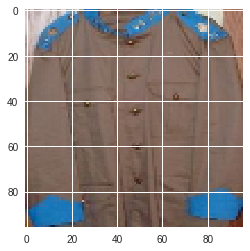

In [94]:
index = 59007
img = cv2.cvtColor(train_data[index], cv2.COLOR_BGR2RGB)
print('Label: ' + str(train_y[index]))
plt.imshow(img)

In [0]:
# saves the output from vgg16 model for training and validation data
def save_pretrained_features(h, w, batch_size, train_data_dir, nb_train_samples,
                            nb_validation_samples, validation_data_dir):
    
    # load the VGG16 network
    model = applications.VGG16(include_top=False, weights='imagenet')
    
    # load training data
    train_data = load_data("datalab/caavo/" + 'dataset/train/', dir_list_train, h, w )
   
    # get the output from VGG 16 model for training data
    vgg16_features_train = model.predict(train_data,  verbose = 1)
    # save the numpy matrix
    np.save('drive/Colab Notebooks/caavo' + 'vgg16_features_train'+ str(h)+'.npy', vgg16_features_train)
    print('Training data saved')
    train_y = create_labels(dir_list_train, True)
    # save the numpy matrix
    np.save('drive/Colab Notebooks/caavo' + 'train_y'+ str(h)+'.npy', train_y)
    print('Training labels saved')
    
    # load validation data
    val_data = load_data("datalab/caavo/" + 'dataset/validation/', dir_list_val, h, w )
    
    # prediction for vgg16 validation data
    vgg16_features_validation = model.predict(val_data,  verbose = 1)
    
    # save the numpy matrix for validation output
    np.save('drive/Colab Notebooks/caavo' + 'vgg16_features_validation'+ str(h)+'.npy', vgg16_features_validation)
    print('Val data saved')
    val_y = create_labels(dir_list_val, True)
    # save the numpy matrix
    np.save('drive/Colab Notebooks/caavo' + 'val_y'+ str(h)+'.npy', val_y)
    print('Val labels saved')

In [0]:
# prepares the training and validation data for training of FC layers
def prepare_train_val_data(dir_list_train, dir_list_val, h):
    # load the training vgg16 features
    train_x = np.load('drive/Colab Notebooks/caavo' + 'vgg16_features_train'+ str(h)+'.npy')
    print('Training data loaded')
    
    # prepare output labels for training
    train_y = np.load('drive/Colab Notebooks/caavo' + 'train_y'+ str(h)+'.npy')
    print('Training labels loaded')
    
    # load the validation vgg16 features
    val_x = np.load('drive/Colab Notebooks/caavo' + 'vgg16_features_validation'+ str(h)+'.npy')
    print('Validation data loaded')
    # prepare output labels for validation
    val_y = np.load('drive/Colab Notebooks/caavo' + 'val_y'+ str(h)+'.npy')
    print('Validation labels loaded')
    
    return train_x, train_y, val_x, val_y

In [0]:
# dimensions of our images.
img_width, img_height = 150, 150

fc_model_path = 'drive/Colab Notebooks/caavo' + 'vgg_fc_model'+ str(img_height)+'.h5'
fc_weights_path = 'drive/Colab Notebooks/caavo' + 'vgg_fc_weights'+ str(img_height)+'.h5'
train_data_dir = 'datalab/caavo/' + 'dataset/train'
validation_data_dir = 'datalab/caavo/' + 'dataset/validation'
nb_train_samples = total_train_samples
#nb_train_samples = 92641
nb_validation_samples = total_val_samples
#nb_validation_samples = 7379
epochs = 1
batch_size = 16

In [17]:
# save vgg features
save_pretrained_features(img_height, img_width, batch_size, train_data_dir, nb_train_samples,
                            nb_validation_samples, validation_data_dir)

100%|██████████| 15/15 [01:27<00:00,  5.80s/it]


62258/62258 [==============================] - 300s 5ms/step
Training data saved


  0%|          | 0/15 [00:00<?, ?it/s]

Training labels saved


100%|██████████| 15/15 [00:15<00:00,  1.05s/it]


7359/7359 [==============================] - 37s 5ms/step
Val data saved
Val labels saved


In [18]:
# prepare data for training
train_x, train_y, val_x, val_y = prepare_train_val_data(dir_list_train, dir_list_val, img_height)

OSError: ignored

In [19]:
print(train_x.shape)
print(train_y.shape)
print(val_x.shape)
print(val_y.shape)

NameError: ignored

In [0]:
# counts no. of images of given resolution from each category
def count_res_images(path, dir_list, dim):
  c = 0
  new_res = []
  for i in range(15):
    label = str(i)
    for _,filename in enumerate(dir_list[i]):
      img = cv2.imread(path + label + '/' + filename, -1)
      h,_,_ = img.shape
      if h >= dim:
        c += 1
    print(label + ': ' + str(c))
    new_res = new_res + [c]
    c = 0
  
  return new_res

In [52]:
new_res = count_res_images("datalab/caavo/" + 'dataset/train/', dir_list_train, 150)

0: 739
1: 5120
2: 6958
3: 7145
4: 7526
5: 569
6: 4171
7: 1028
8: 3410
9: 4523
10: 3853
11: 1014
12: 3958
13: 2209
14: 576


In [53]:
# training path
path = "datalab/caavo/" + 'dataset//train//'
dir_list_orig = []
# shows the distribution of images of different categories
for i in range(15):
    label = str(i)
    dirs = scan_dir(label, path + label)
    print(label + ': ' + str(len(dirs)))
    dir_list_orig =  dir_list_orig + [len(dirs) ]

0: 784
1: 6186
2: 7936
3: 8203
4: 8835
5: 683
6: 5083
7: 1248
8: 3752
9: 5301
10: 4560
11: 1248
12: 4848
13: 2935
14: 656


In [54]:
for i in range(15):
  print(str(i) + ': ' + str(dir_list_orig[i] - new_res[i]))

0: 45
1: 1066
2: 978
3: 1058
4: 1309
5: 114
6: 912
7: 220
8: 342
9: 778
10: 707
11: 234
12: 890
13: 726
14: 80


In [0]:
from keras.callbacks import ModelCheckpoint
from keras import callbacks
from keras.callbacks import EarlyStopping
from keras.layers import MaxPool2D

In [0]:
# stops training when no significant progress is made
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

In [0]:
# model architecture
def get_model(train_x):
    
    model = Sequential()
   
    model.add(Flatten(input_shape=train_x.shape[1:]))
    model.add(Dense(1200, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.80))
    
    model.add(Dense(1200, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.8))
    
    model.add(Dense(1200, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.9))
    
    model.add(Dense(15, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy', metrics=['accuracy'])   
    return model

In [0]:
'''
saves the model weights after each epoch if the validation loss decreased
'''
checkpoint = ModelCheckpoint(filepath='drive/Colab Notebooks/weights_best.hdf5', monitor='val_acc', verbose=1, save_best_only=True)

In [104]:
model = get_model(train_x)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_41 (Dense)             (None, 1200)              9831600   
_________________________________________________________________
batch_normalization_31 (Batc (None, 1200)              4800      
_________________________________________________________________
dropout_31 (Dropout)         (None, 1200)              0         
_________________________________________________________________
dense_42 (Dense)             (None, 1200)              1441200   
_________________________________________________________________
batch_normalization_32 (Batc (None, 1200)              4800      
_________________________________________________________________
dropout_32 (Dropout)         (None, 1200)              0         
__________

In [0]:
#model.load_weights('drive/Colab Notebooks/weights_best.hdf5')

In [1]:
rounds = 10
epochs = 10
batch_size = 128
for i in tqdm(range(rounds)):
  # start training
  hist = model.fit(train_x, train_y,
                epochs=epochs,
                batch_size=batch_size,
                validation_data=(val_x, val_y), callbacks=[checkpoint])
  # save the model
  model.save_weights(fc_model_path)
  # save the model weights
  model.save_weights(fc_weights_path)

NameError: ignored

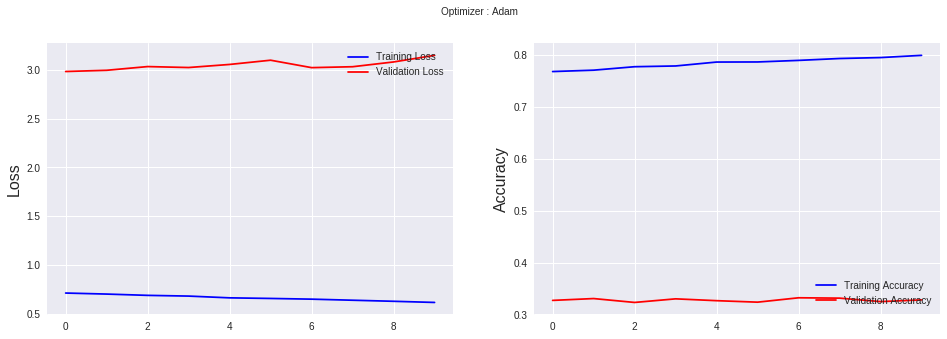

In [91]:
plt.figure(figsize=(16,5))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(hist.history['loss'], color='b', label='Training Loss')
plt.plot(hist.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(hist.history['acc'], color='b', label='Training Accuracy')
plt.plot(hist.history['val_acc'], color='r', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()



In [0]:
model.load_weights('drive/Colab Notebooks/weights_best.hdf5')

In [93]:
train_acc = hist.history['acc']
val_acc = hist.history['val_acc']
print('Training Accuracy: ', train_acc[-1])
print('Validation Accuracy: ', val_acc[-1])

score, acc = model.evaluate(val_x, val_y,
                            batch_size=128)
print('Test loss:', score)
print('Test accuracy:', acc)

Training Accuracy:  0.7988210350706819
Validation Accuracy:  0.328033700238603
7359/7359 [==============================] - 0s 59us/step
Test loss: 2.900970527279845
Test accuracy: 0.33808941433778483


## For testing on custom images

In [0]:
val_data =load_data("datalab/caavo/" + 'dataset/validation/', dir_list_val, 64, 64 )

(1, 64, 64, 3)
Predicted: 10
Label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


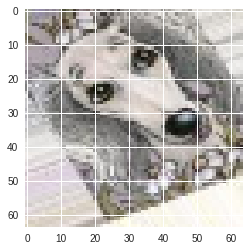

In [97]:
index = 5000
img = cv2.resize(val_data[index], (64,64))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = img.reshape((1,) + img.shape)  
print(img.shape)
# load the VGG16 network
vggmodel = applications.VGG16(include_top=False, weights='imagenet')
vgg_out = vggmodel.predict(img)

pred = model.predict(vgg_out)
print('Predicted: ' + str(np.argmax(pred)))

print('Label: ' + str(val_y[index]))
plt.imshow(img[0])

## For generating submission file

Load test data

In [33]:
# test path
path = "datalab/caavo/" + 'dataset//test//'
dir_list_test = []

dir_list_test = os.listdir( path )
print(label + ': ' + str(len(dir_list_test)))

14: 21273


Pass test data through vgg

In [35]:
# load the VGG16 network
vggmodel = applications.VGG16(include_top=False, weights='imagenet')

# load training data
test_data = []
for filename in dir_list_test:
    img = cv2.imread(path + filename, -1)
    img = cv2.resize(img, (150, 150))
    test_data.append(img)
test_data = np.array(test_data)

print('Test data loaded')
# get the output from VGG 16 model for training data
vgg16_features_test = vggmodel.predict(test_data,  verbose = 1)
print('Features extracted')

# save the numpy matrix
np.save('drive/Colab Notebooks/caavo' + 'vgg16_features_test150.npy', vgg16_features_test)
print('Test data saved')
del vgg16_features_test

Test data loaded
21273/21273 [==============================] - 103s 5ms/step
Features extracted
Test data saved


In [36]:
# load the training vgg16 features
test_x = np.load('drive/Colab Notebooks/caavo' + 'vgg16_features_test150.npy')
test_x.shape

(21273, 4, 4, 512)

In [94]:
# pass through FC model
pred = model.predict(test_x)
pred.shape

(21273, 15)

In [95]:
pred_test = np.argmax(pred, axis=1)
pred_test.shape

(21273,)

In [96]:
with open('drive/Colab Notebooks/caavo/' + 'sub.csv', 'w') as f:
  f.write('image_name,category\n')
  for i in tqdm(range(len(dir_list_test))):
    data = str(dir_list_test[i]) + ',' + str(pred_test[i]) + '\n'
    f.write(data)


100%|██████████| 21273/21273 [00:01<00:00, 21248.05it/s]
